In [325]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import colorama

In [326]:
pm = pd.read_csv("/Users/meijiaojiao/Desktop/Evolution_algorithm/Experiment14/Experiment14(0~5)/parameter_combinations.csv",header=0,index_col=[0])

In [327]:
print(colorama.Fore.GREEN+f"the shape of parameter combinations dataframe is {pm.shape}")
print(colorama.Fore.GREEN+f"there are {pm.shape[0]} parameter combinations in total")
print(colorama.Fore.GREEN+f"the parameters are as the following {pm.columns.tolist()}")

the shape of parameter combinations dataframe is (345600, 16)
there are 345600 parameter combinations in total
the parameters are as the following ['num_generations', 'mutation_rate', 'num_individuals', 'crossover_rate', 'mutation_type', 'crossover_type', 'local_search_rate', 'local_search_type', 'search_radius', 'num_evaluations', 'threshold', 'gg', 'dimensions', 'selection_method', 'fitness_function', 'algorithm']


In [328]:
# rewrite the code in this cell using a loop
one = pd.read_csv("/Users/meijiaojiao/Desktop/Evolution_algorithm/Experiment14/Experiment14(0~5)/solutions_dataframe.csv",header=0,index_col=0)
two = pd.read_csv("/Users/meijiaojiao/Desktop/Evolution_algorithm/Experiment14/Experiment14(5~10)/solutions_dataframe.csv",header=0,index_col=0)
three = pd.read_csv("/Users/meijiaojiao/Desktop/Evolution_algorithm/Experiment14/Experiment14(10~15)/solutions_dataframe.csv",header=0,index_col=0)
four = pd.read_csv("/Users/meijiaojiao/Desktop/Evolution_algorithm/Experiment14/Experiment14(15~20)/solutions_dataframe.csv",header=0,index_col=0)
five = pd.read_csv("/Users/meijiaojiao/Desktop/Evolution_algorithm/Experiment14/Experiment14(20~25)/solutions_dataframe.csv",header=0,index_col=0)
six = pd.read_csv("/Users/meijiaojiao/Desktop/Evolution_algorithm/Experiment14/Experiment14(25～30)/solutions_dataframe.csv",header=0,index_col=0)
seven = pd.read_csv("/Users/meijiaojiao/Desktop/Evolution_algorithm/Experiment14/Experiment14(30～)/solutions_dataframe.csv",header=0,index_col=0)
solution = pd.concat([one,two,three,four,five,six,seven],axis=0)

In [329]:
solution.columns = ["Run"+str(i) for i in range(1,11,1)]
solution.index=[i for i in range(pm.shape[0])]
solution["sum"] = solution.sum(axis=1)
solution["mean"] = solution.mean(axis=1)
solution["min"] = solution.min(axis=1)
solution["max"] = solution.max(axis=1)
print(colorama.Fore.CYAN+f"the shape of solution dataframe is {solution.shape}")
print(colorama.Fore.CYAN+f"the columns of solution dataframe is the runs {solution.columns.tolist()}")

the shape of solution dataframe is (345600, 14)
the columns of solution dataframe is the runs ['Run1', 'Run2', 'Run3', 'Run4', 'Run5', 'Run6', 'Run7', 'Run8', 'Run9', 'Run10', 'sum', 'mean', 'min', 'max']


In [330]:
df = pd.concat([pm,solution],axis=1)

In [331]:
print(colorama.Fore.RED+f"the columns of df is what we will use for plots {df.columns.tolist()}")
print(colorama.Fore.RED+f"the rows are the data {max(df.index)+1}")

the columns of df is what we will use for plots ['num_generations', 'mutation_rate', 'num_individuals', 'crossover_rate', 'mutation_type', 'crossover_type', 'local_search_rate', 'local_search_type', 'search_radius', 'num_evaluations', 'threshold', 'gg', 'dimensions', 'selection_method', 'fitness_function', 'algorithm', 'Run1', 'Run2', 'Run3', 'Run4', 'Run5', 'Run6', 'Run7', 'Run8', 'Run9', 'Run10', 'sum', 'mean', 'min', 'max']
the rows are the data 345600


In [332]:
function_list = df["fitness_function"].unique().tolist()[:3]
print(colorama.Fore.BLUE+f"{len(function_list)} functions in total")
dimensions_list = df["dimensions"].unique().tolist()
print(colorama.Fore.BLUE+f"{len(dimensions_list)} dimensions in total")
mutation_rate_list = df["mutation_rate"].unique().tolist()
print(colorama.Fore.BLUE+f"{len(mutation_rate_list)} mutation_rate in total")

3 functions in total
2 dimensions in total
2 mutation_rate in total


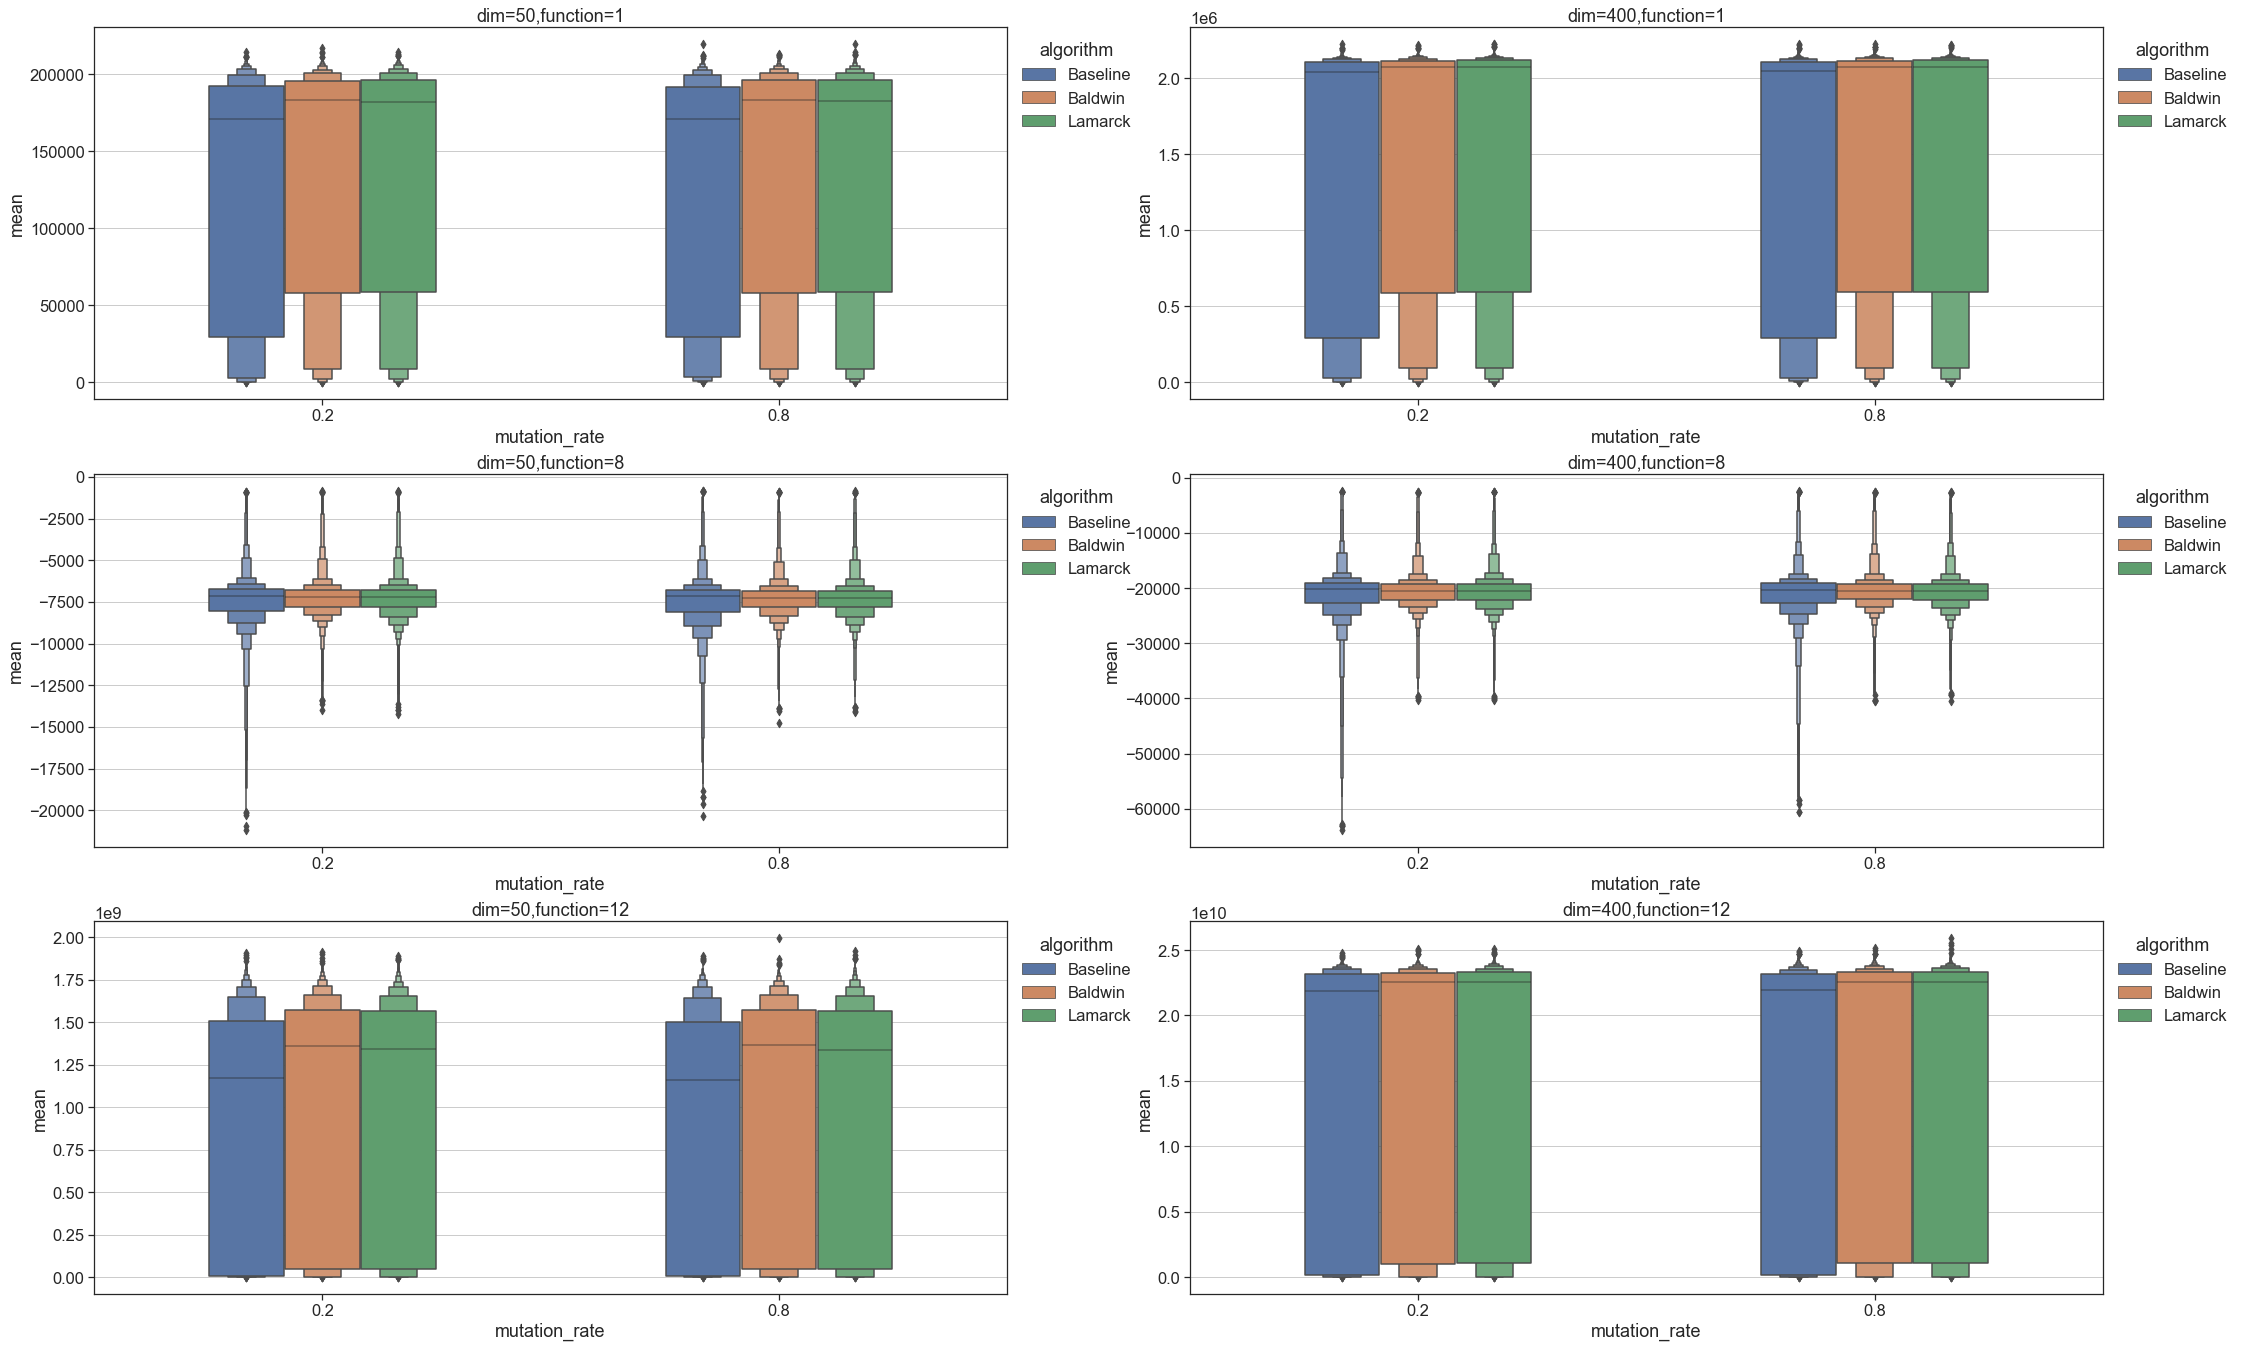

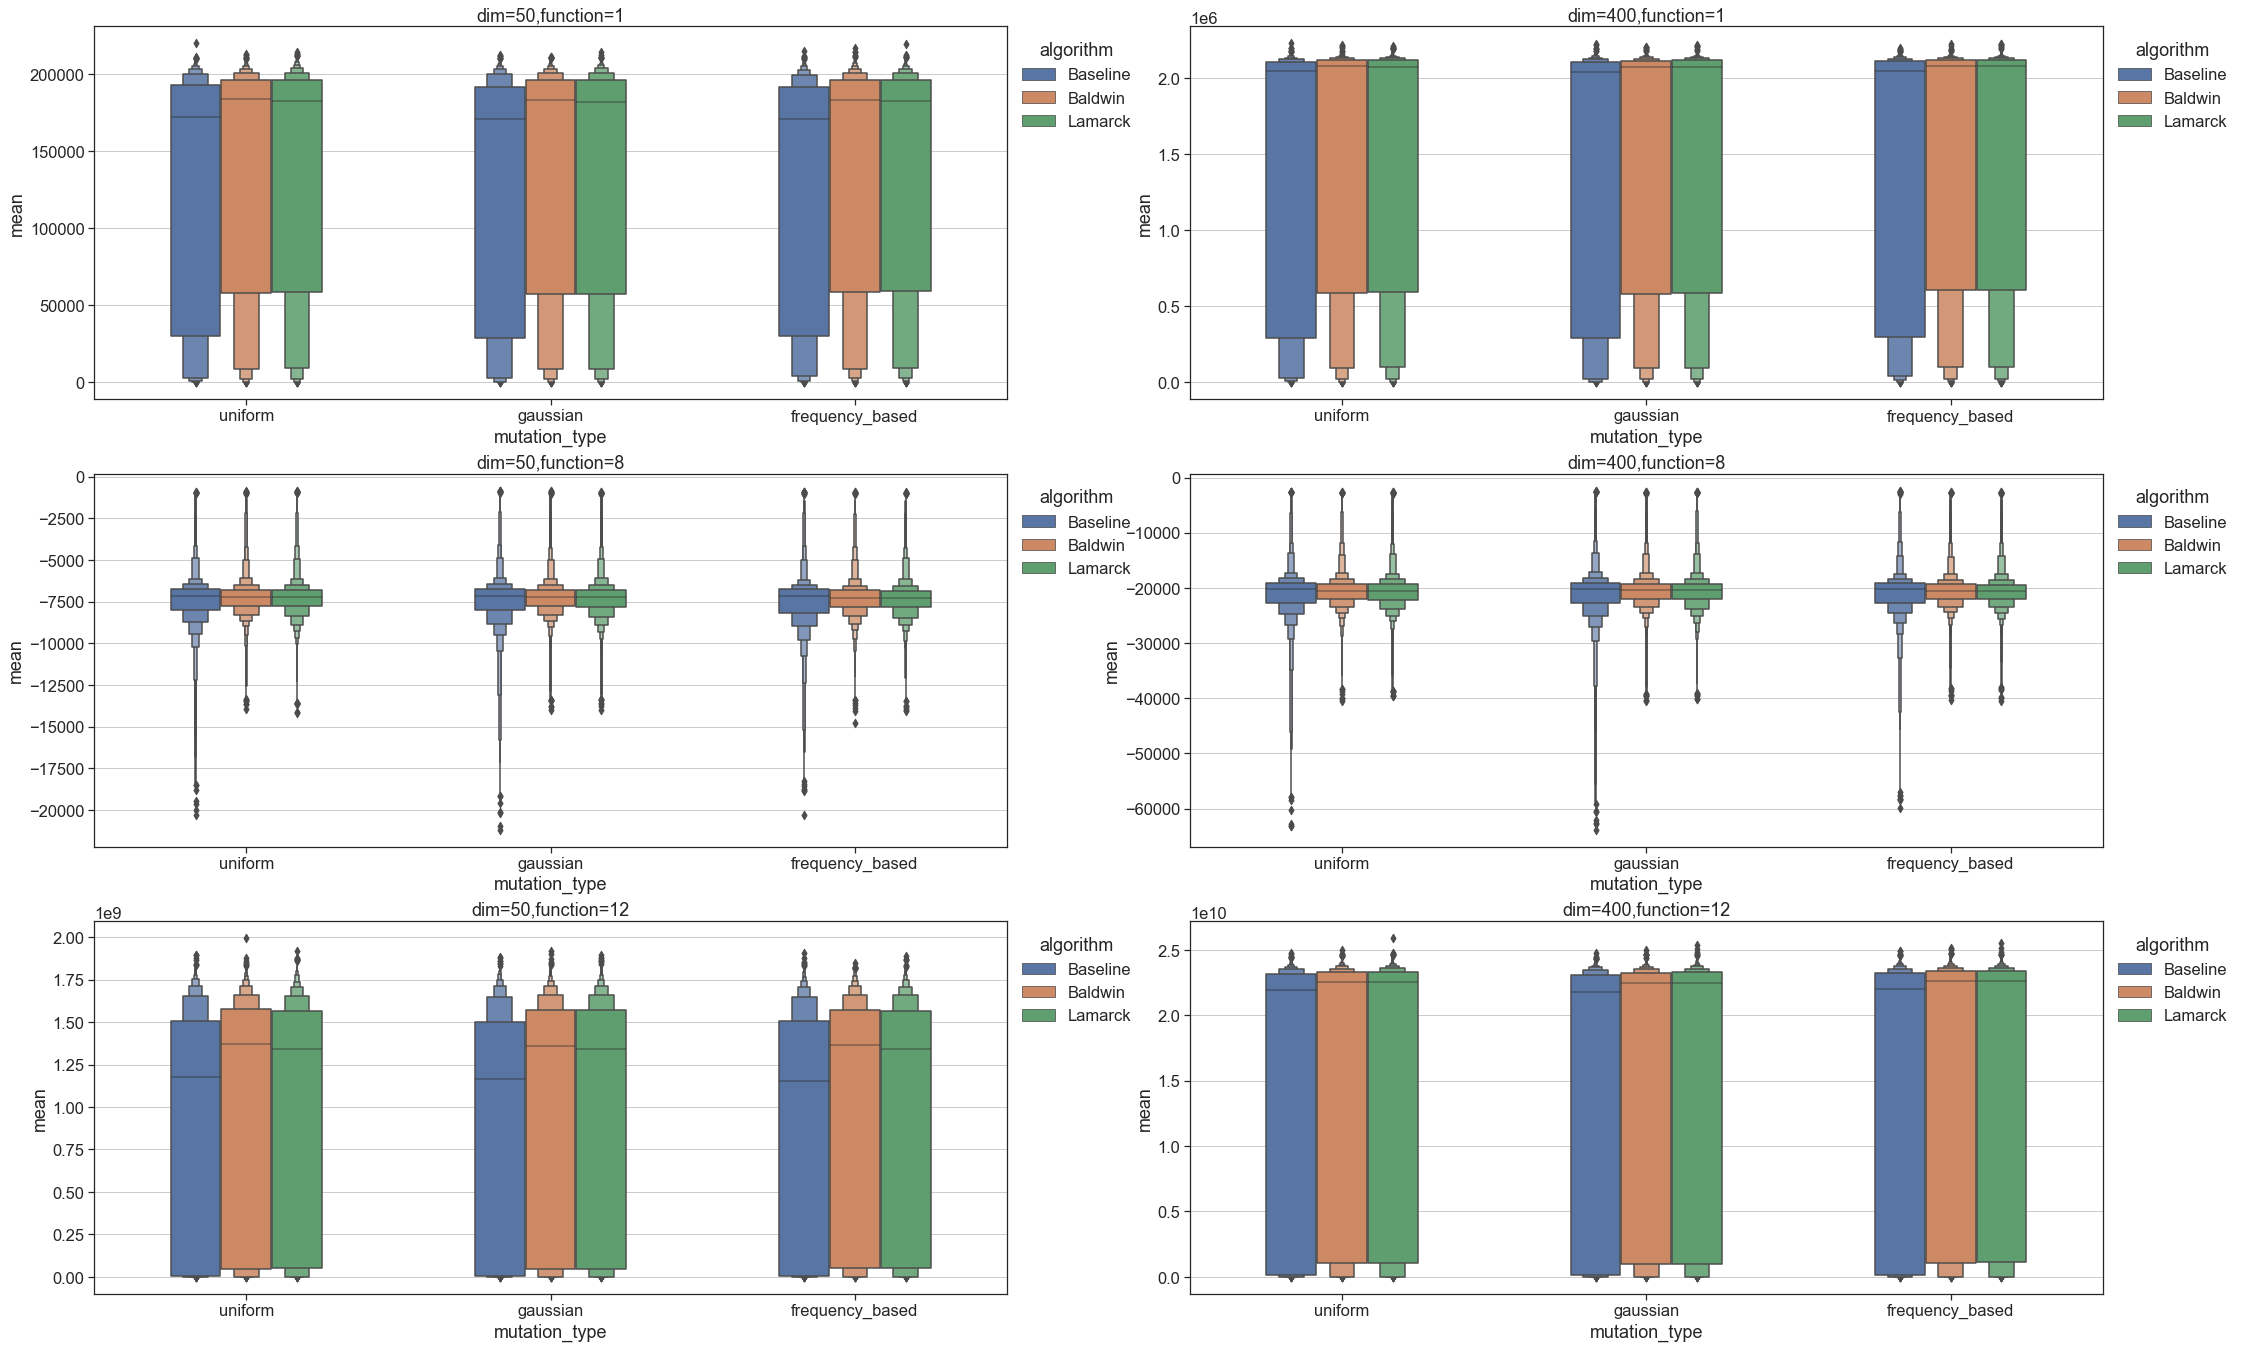

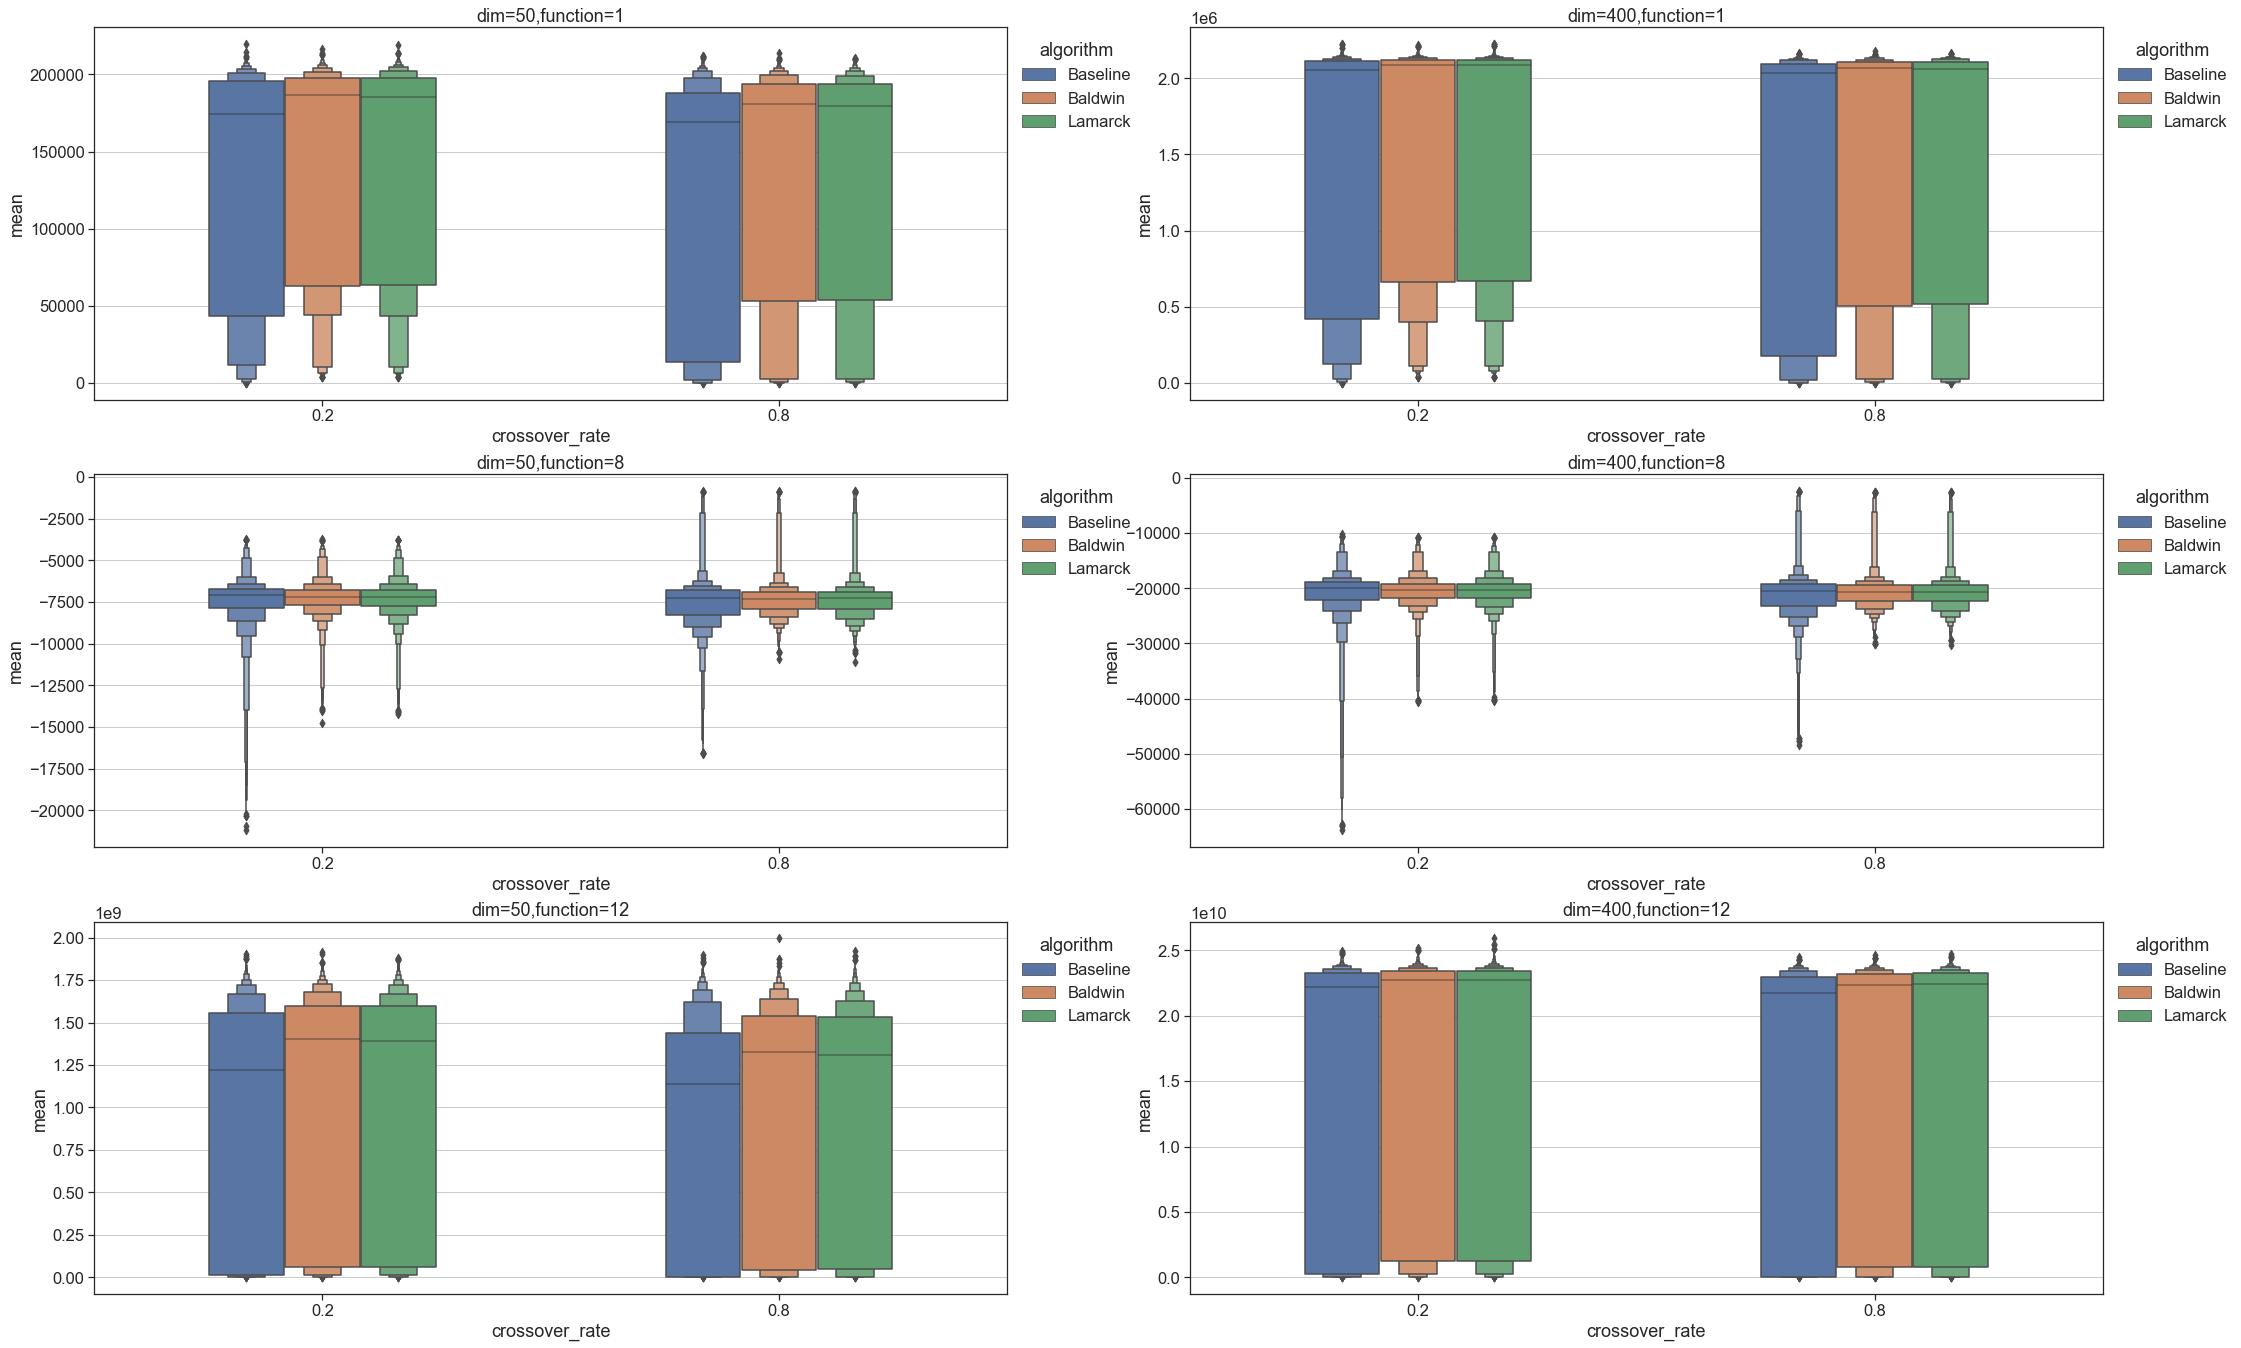

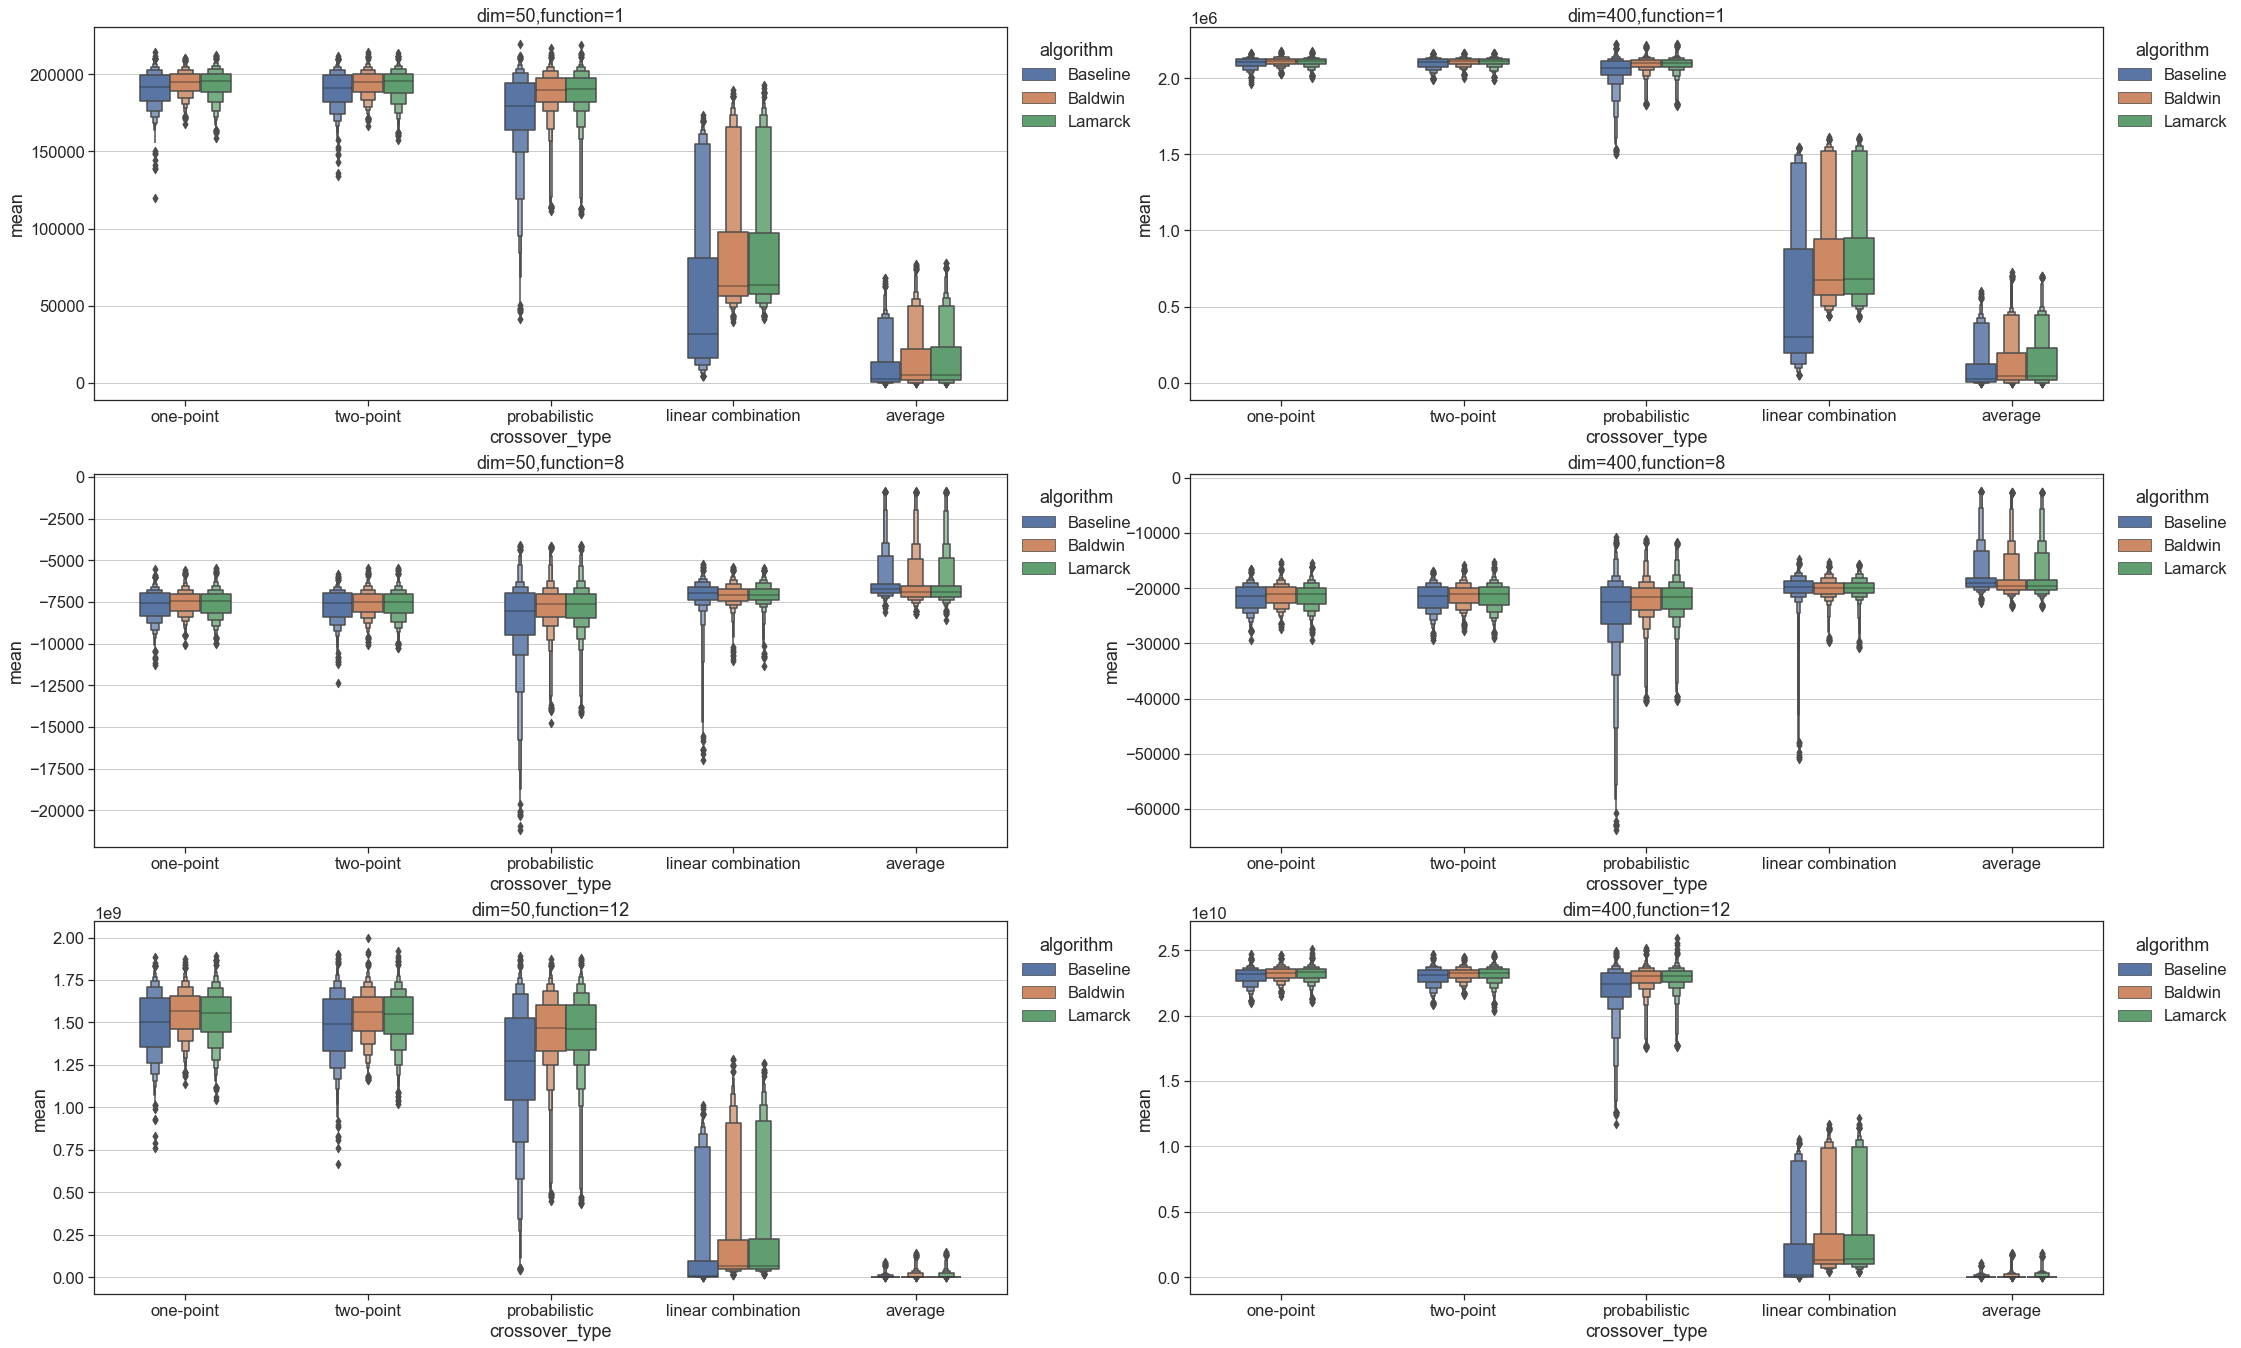

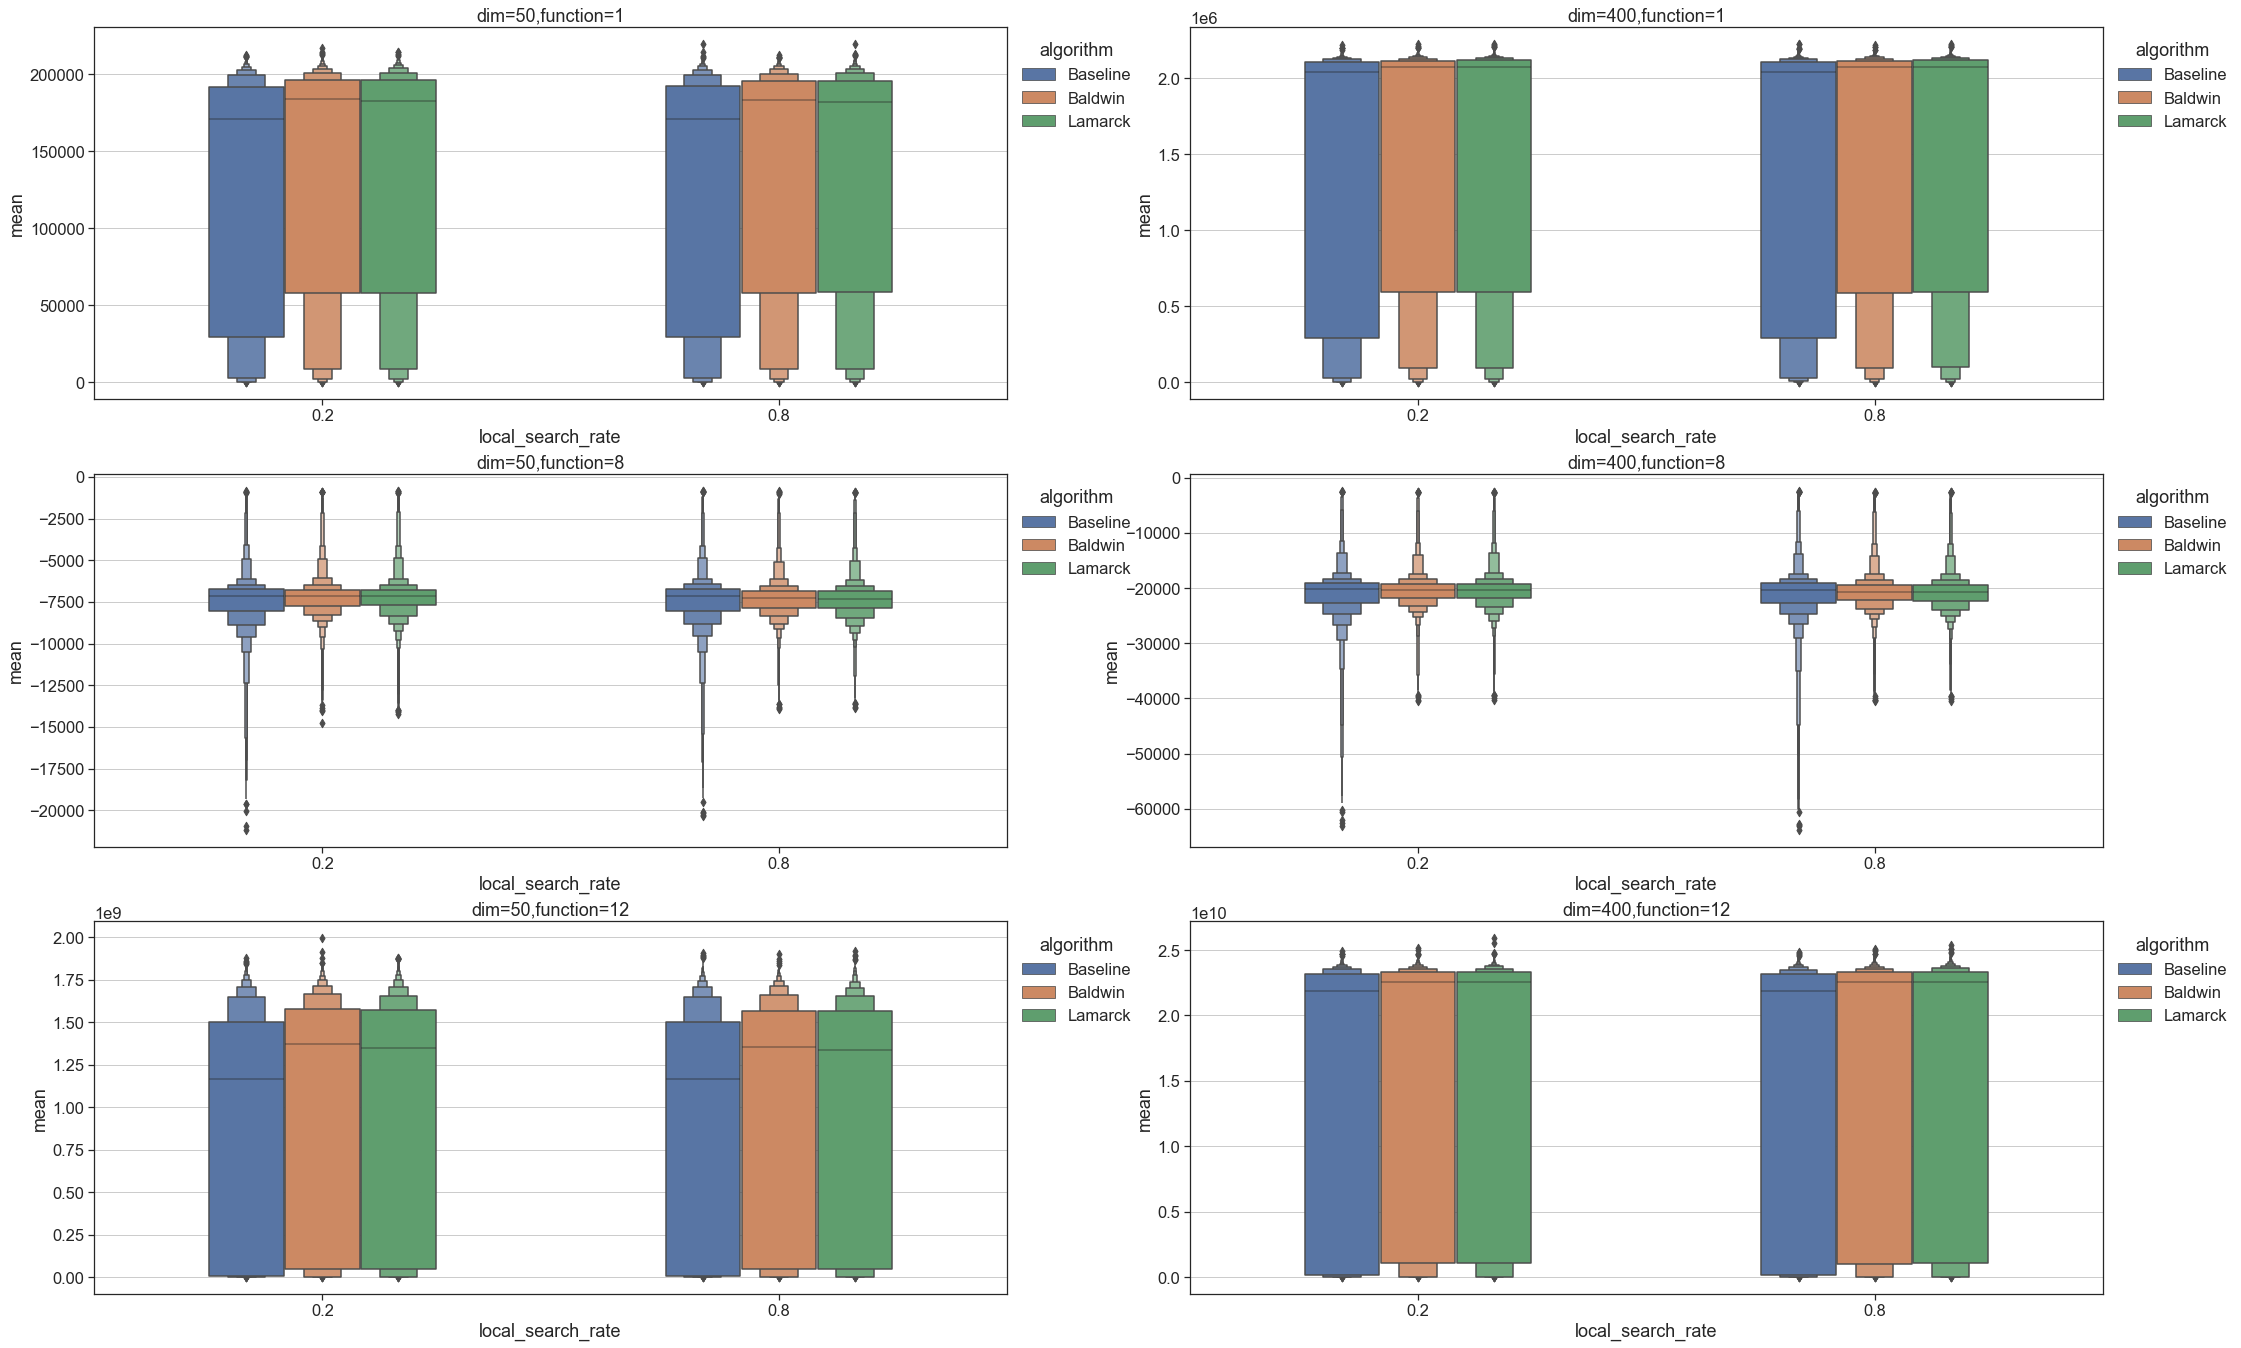

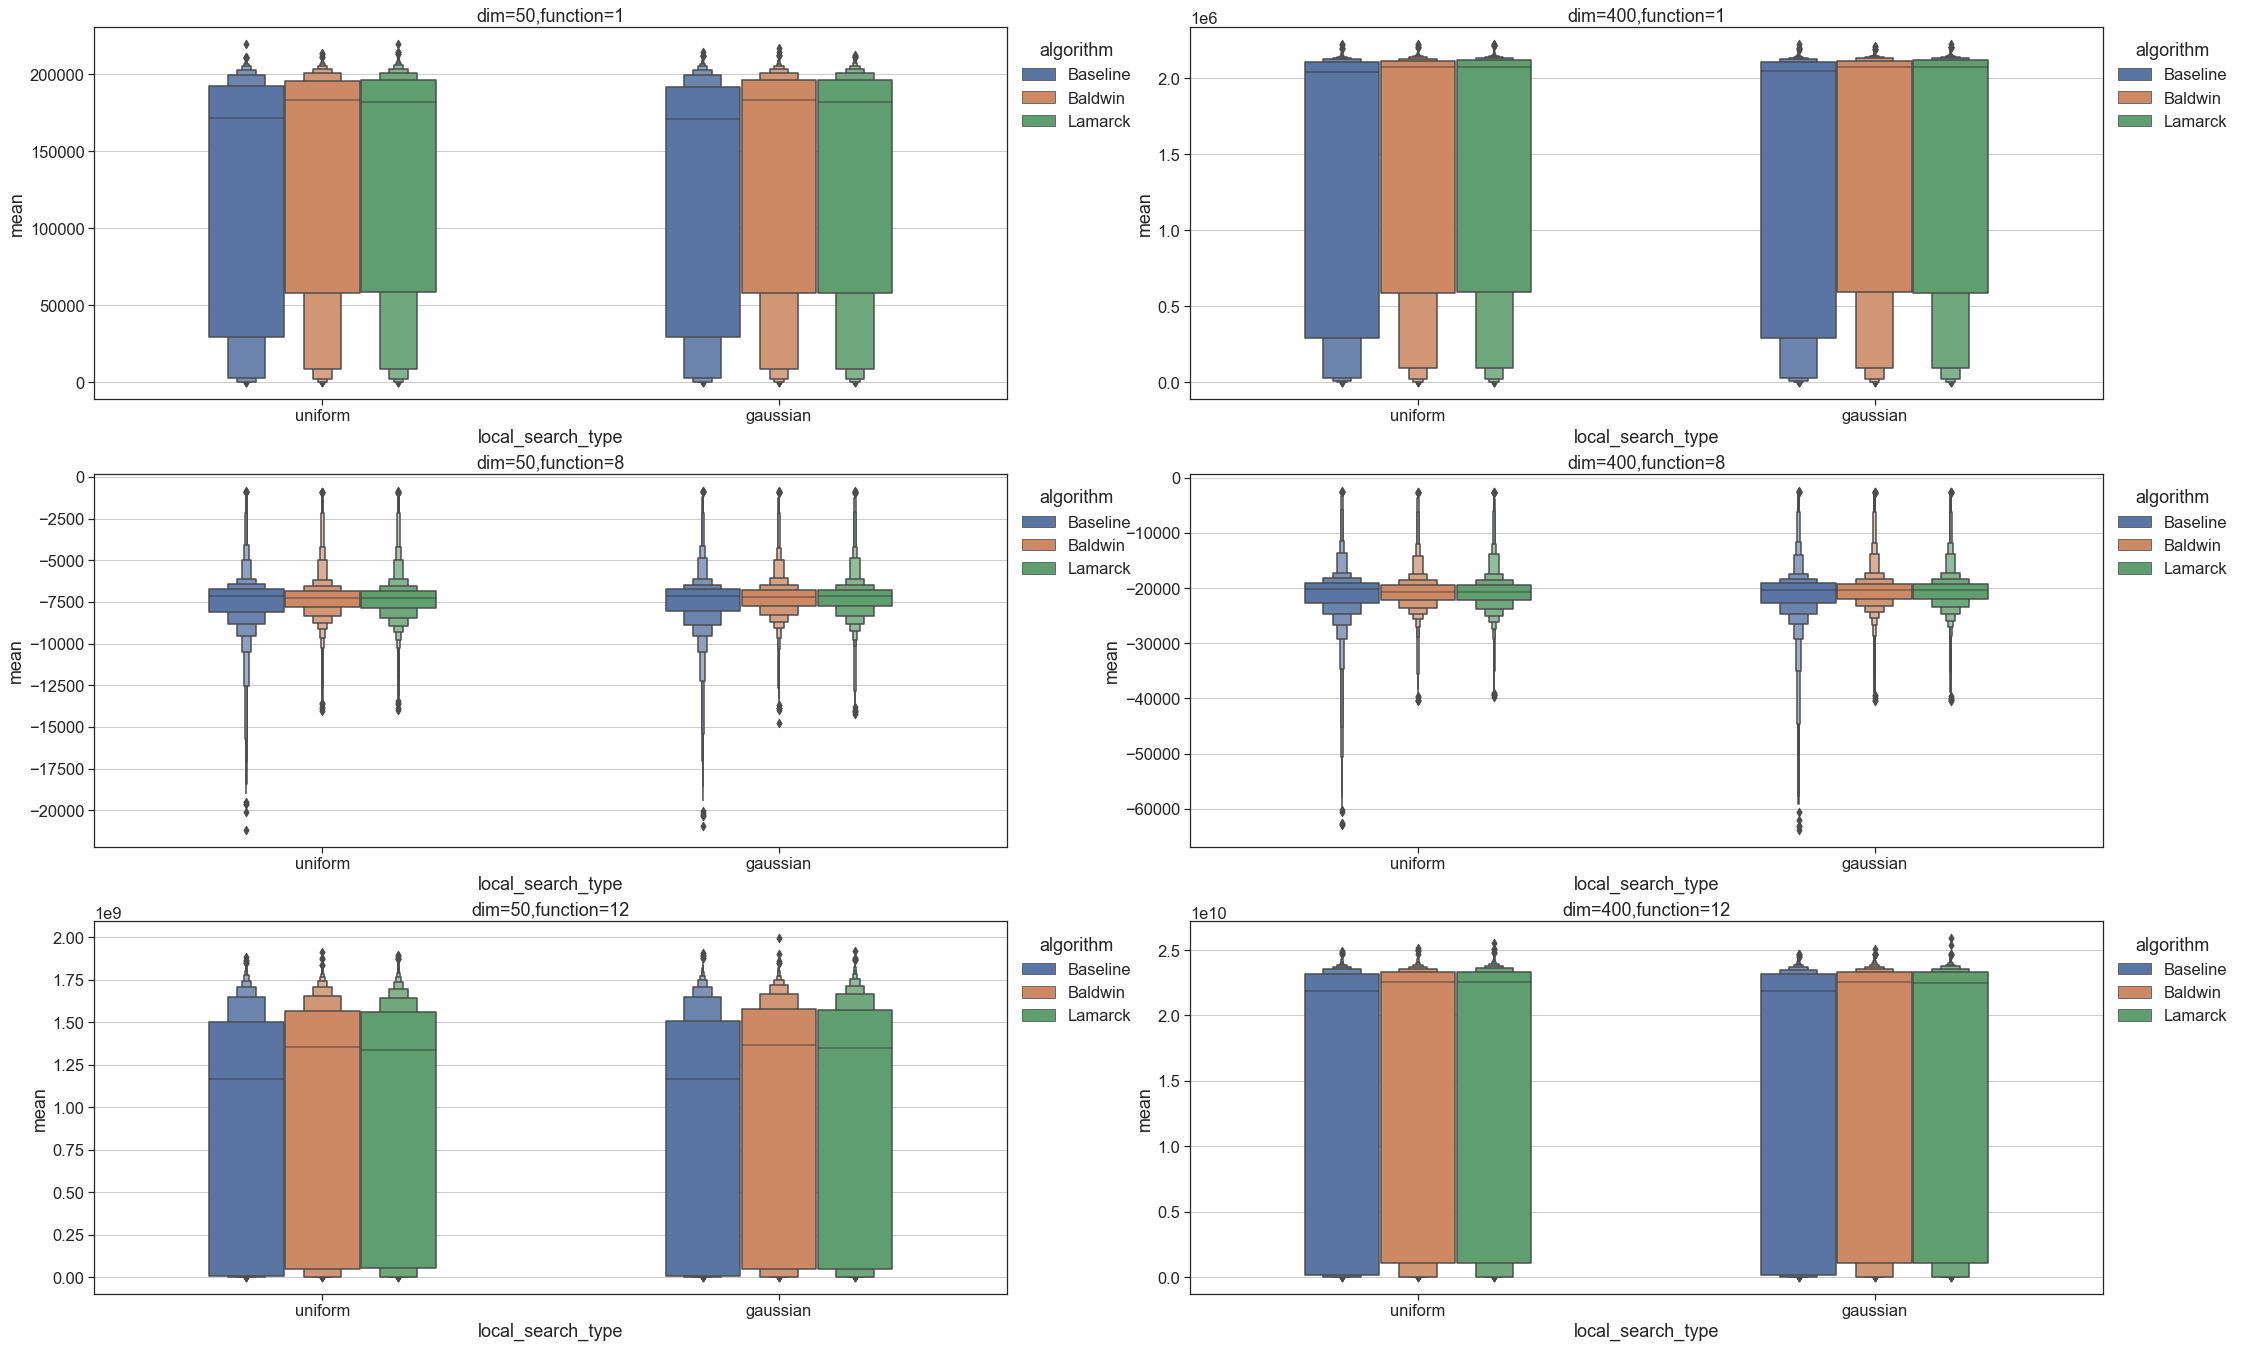

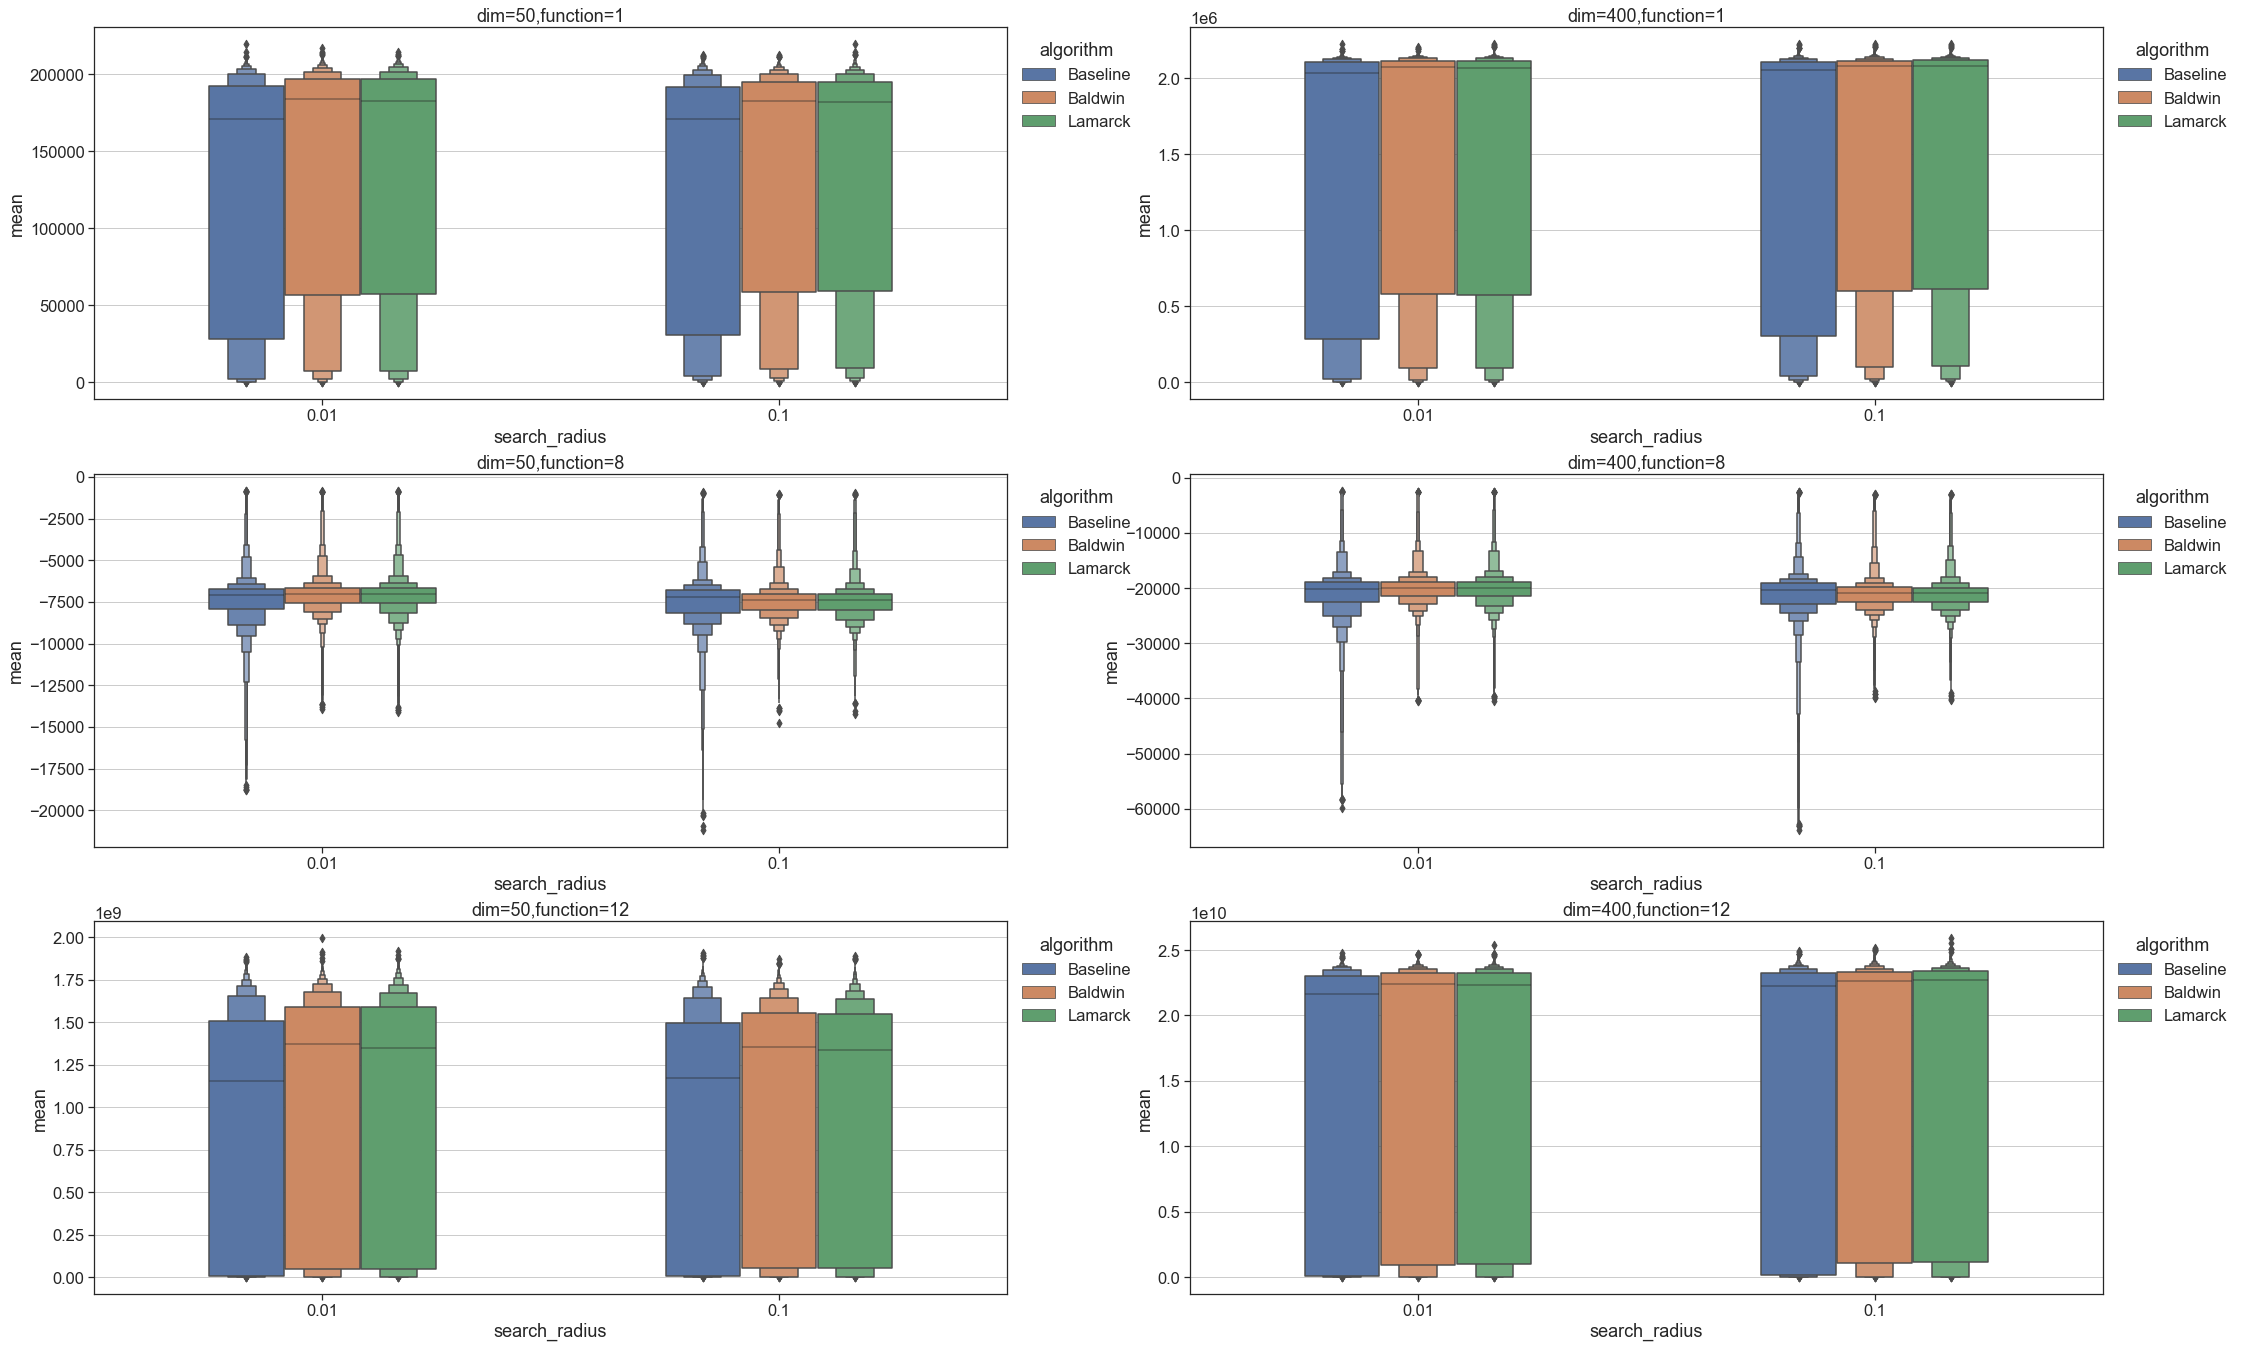

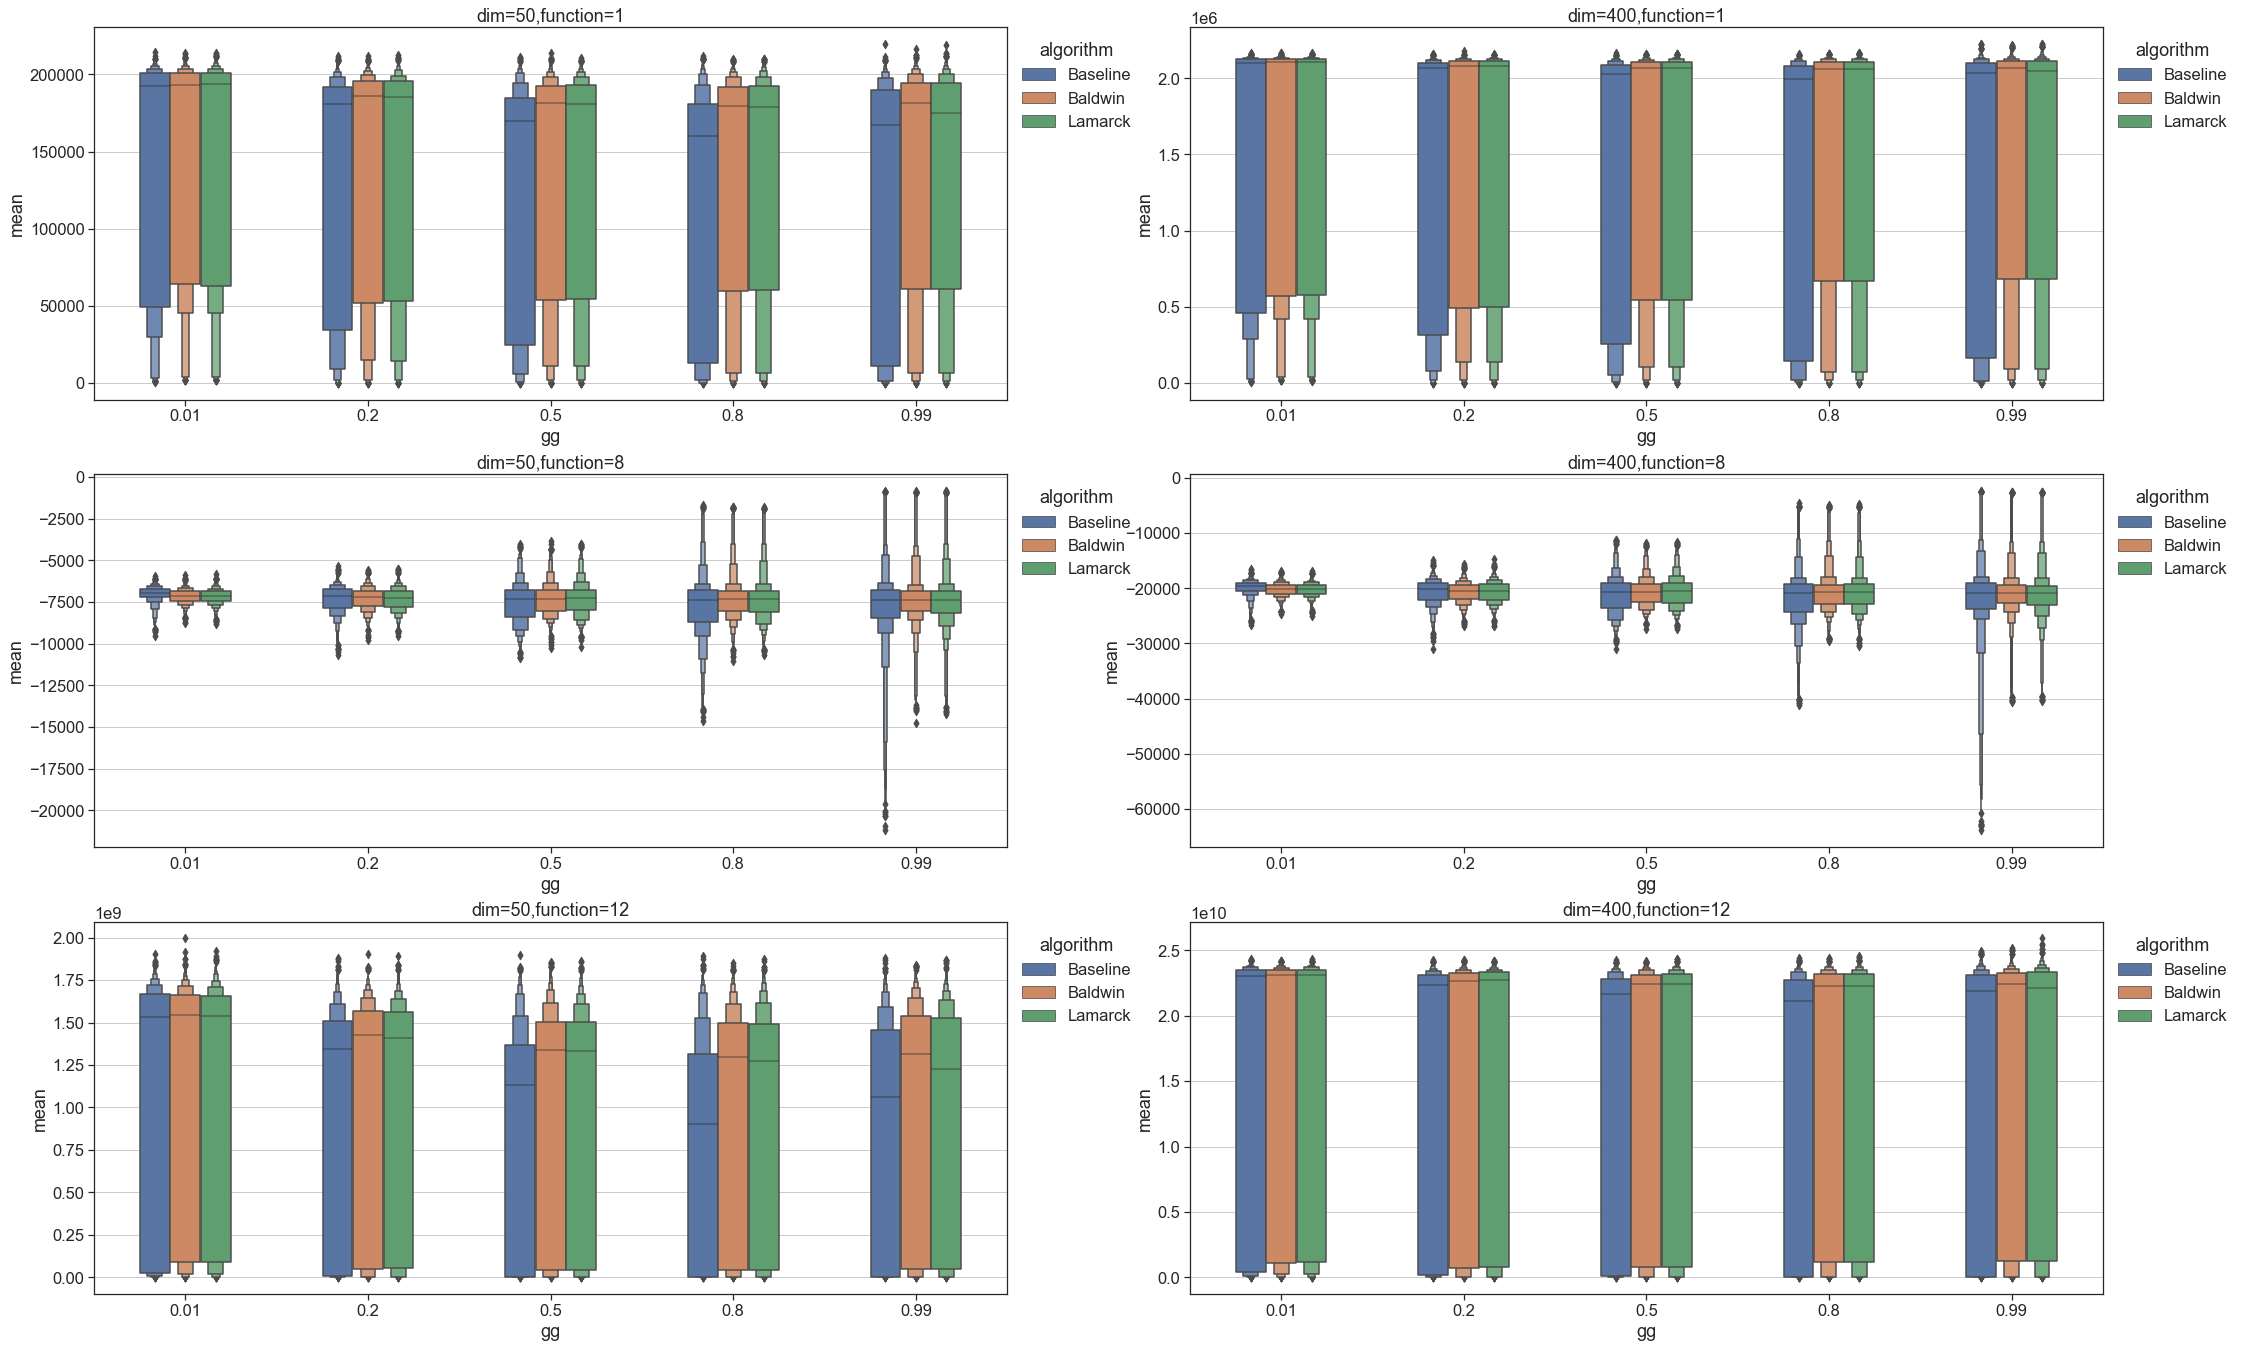

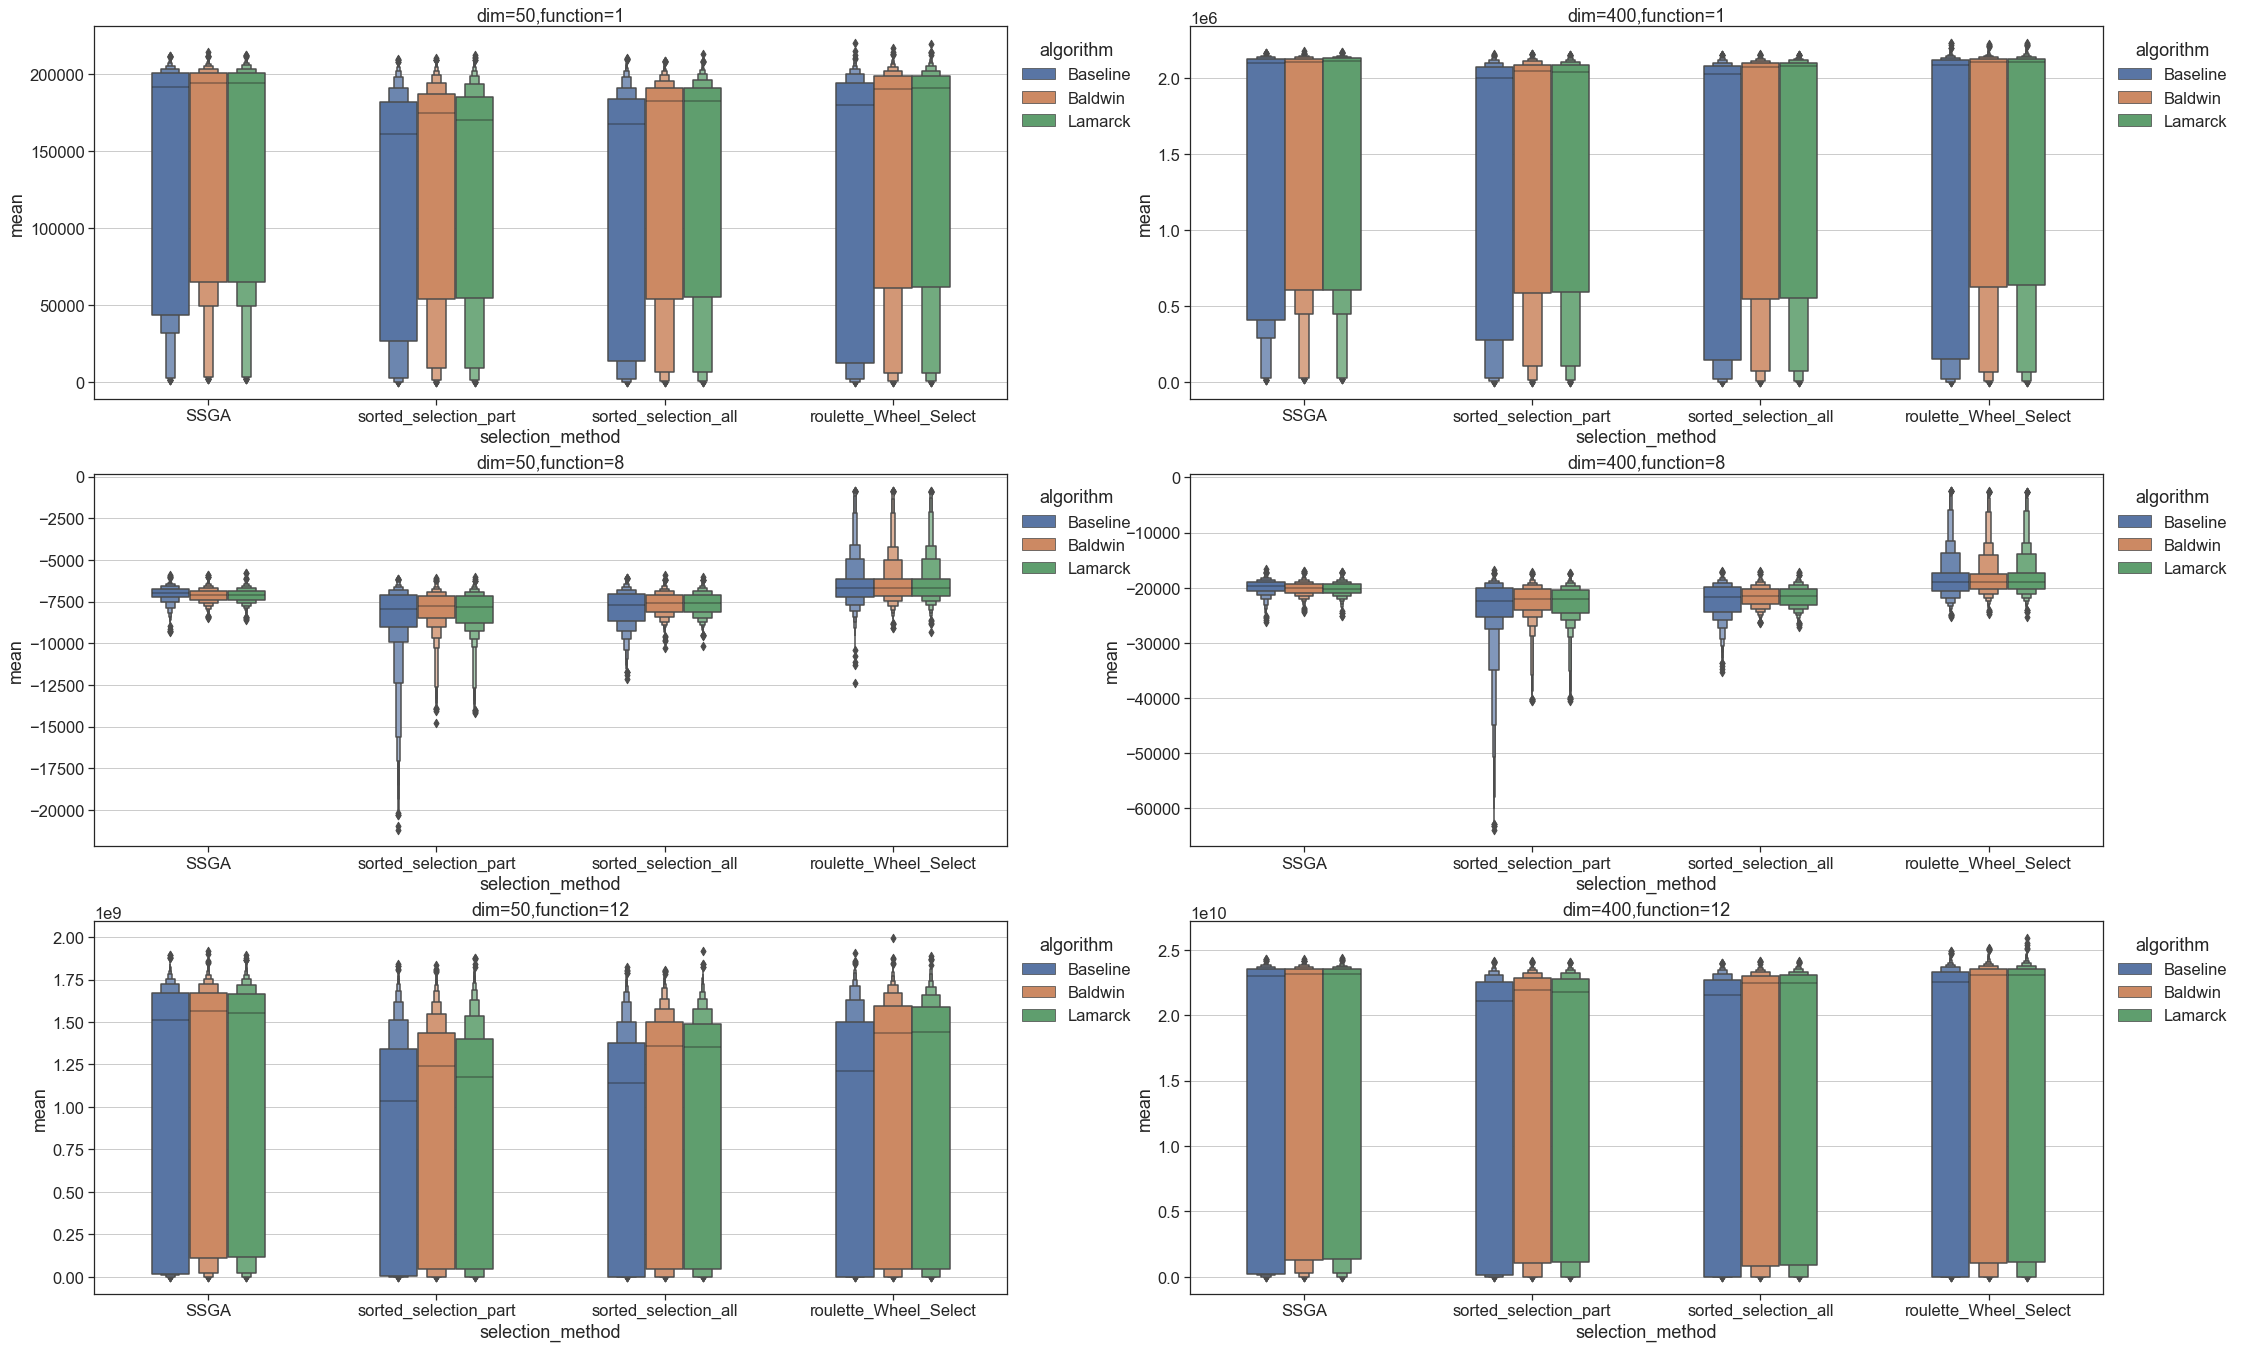

In [333]:
def show_graph(dataframe,xp):
    sns.set_theme(style="whitegrid",font_scale=1.5)
    sns.set_style("ticks",{'axes.grid' : True})
    dist_cols = 2
    dist_rows = 6
    plt.figure(figsize=(18 * dist_cols, 8 * dist_rows))
    i = 1
    for func in function_list:
        for dim in dimensions_list:
            data = dataframe[dataframe["fitness_function"] == func]
            data = data[data["dimensions"] == dim]
            plt.subplot(dist_rows, dist_cols, i)
            ax = sns.boxenplot(data=data, y="mean",x=xp,hue="algorithm",hue_order=["Baseline","Baldwin","Lamarck"],width=0.5)
            sns.move_legend(ax, "upper left", bbox_to_anchor=(1,1),frameon=False)
            plt.title(f"dim={dim},function={func}")
            i = i + 1
    plt.savefig(f"{xp}.png", dpi=400,bbox_inches='tight')
    plt.show()
xp_list=['mutation_rate','mutation_type', 'crossover_rate', 'crossover_type', 'local_search_rate', 'local_search_type', 'search_radius','gg', 'selection_method']
for i in xp_list:
    show_graph(dataframe=df,xp=i)

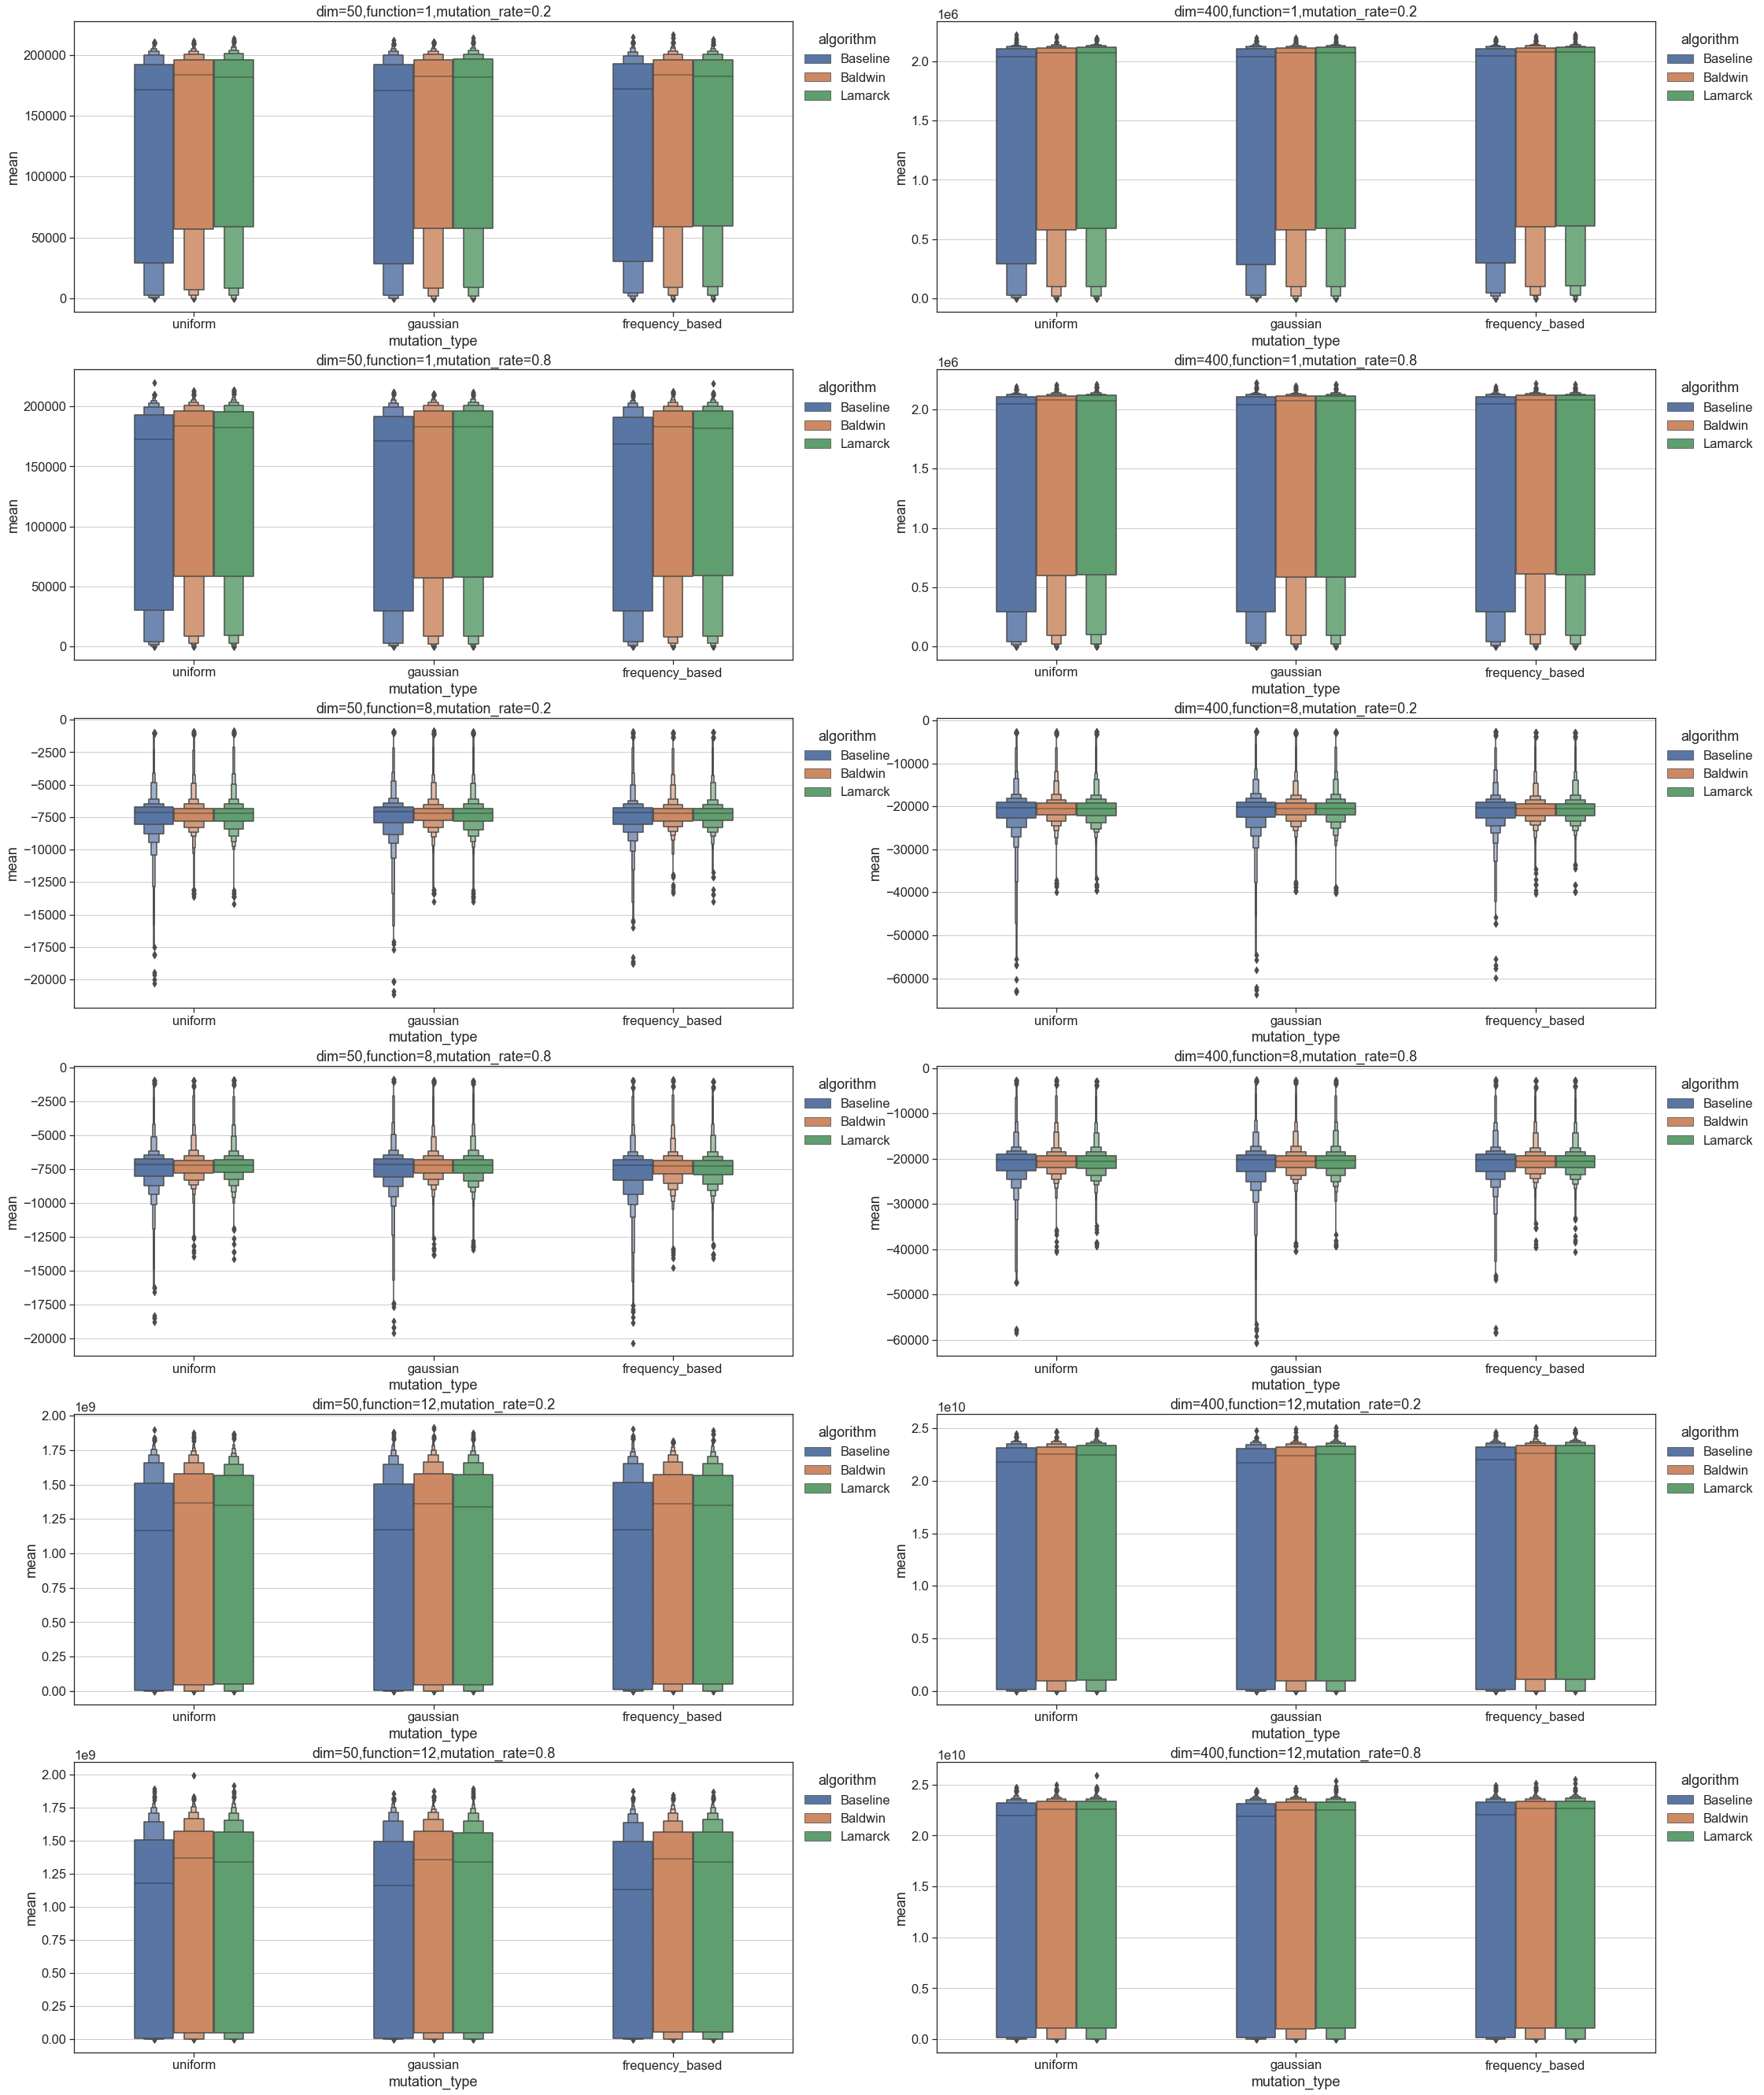

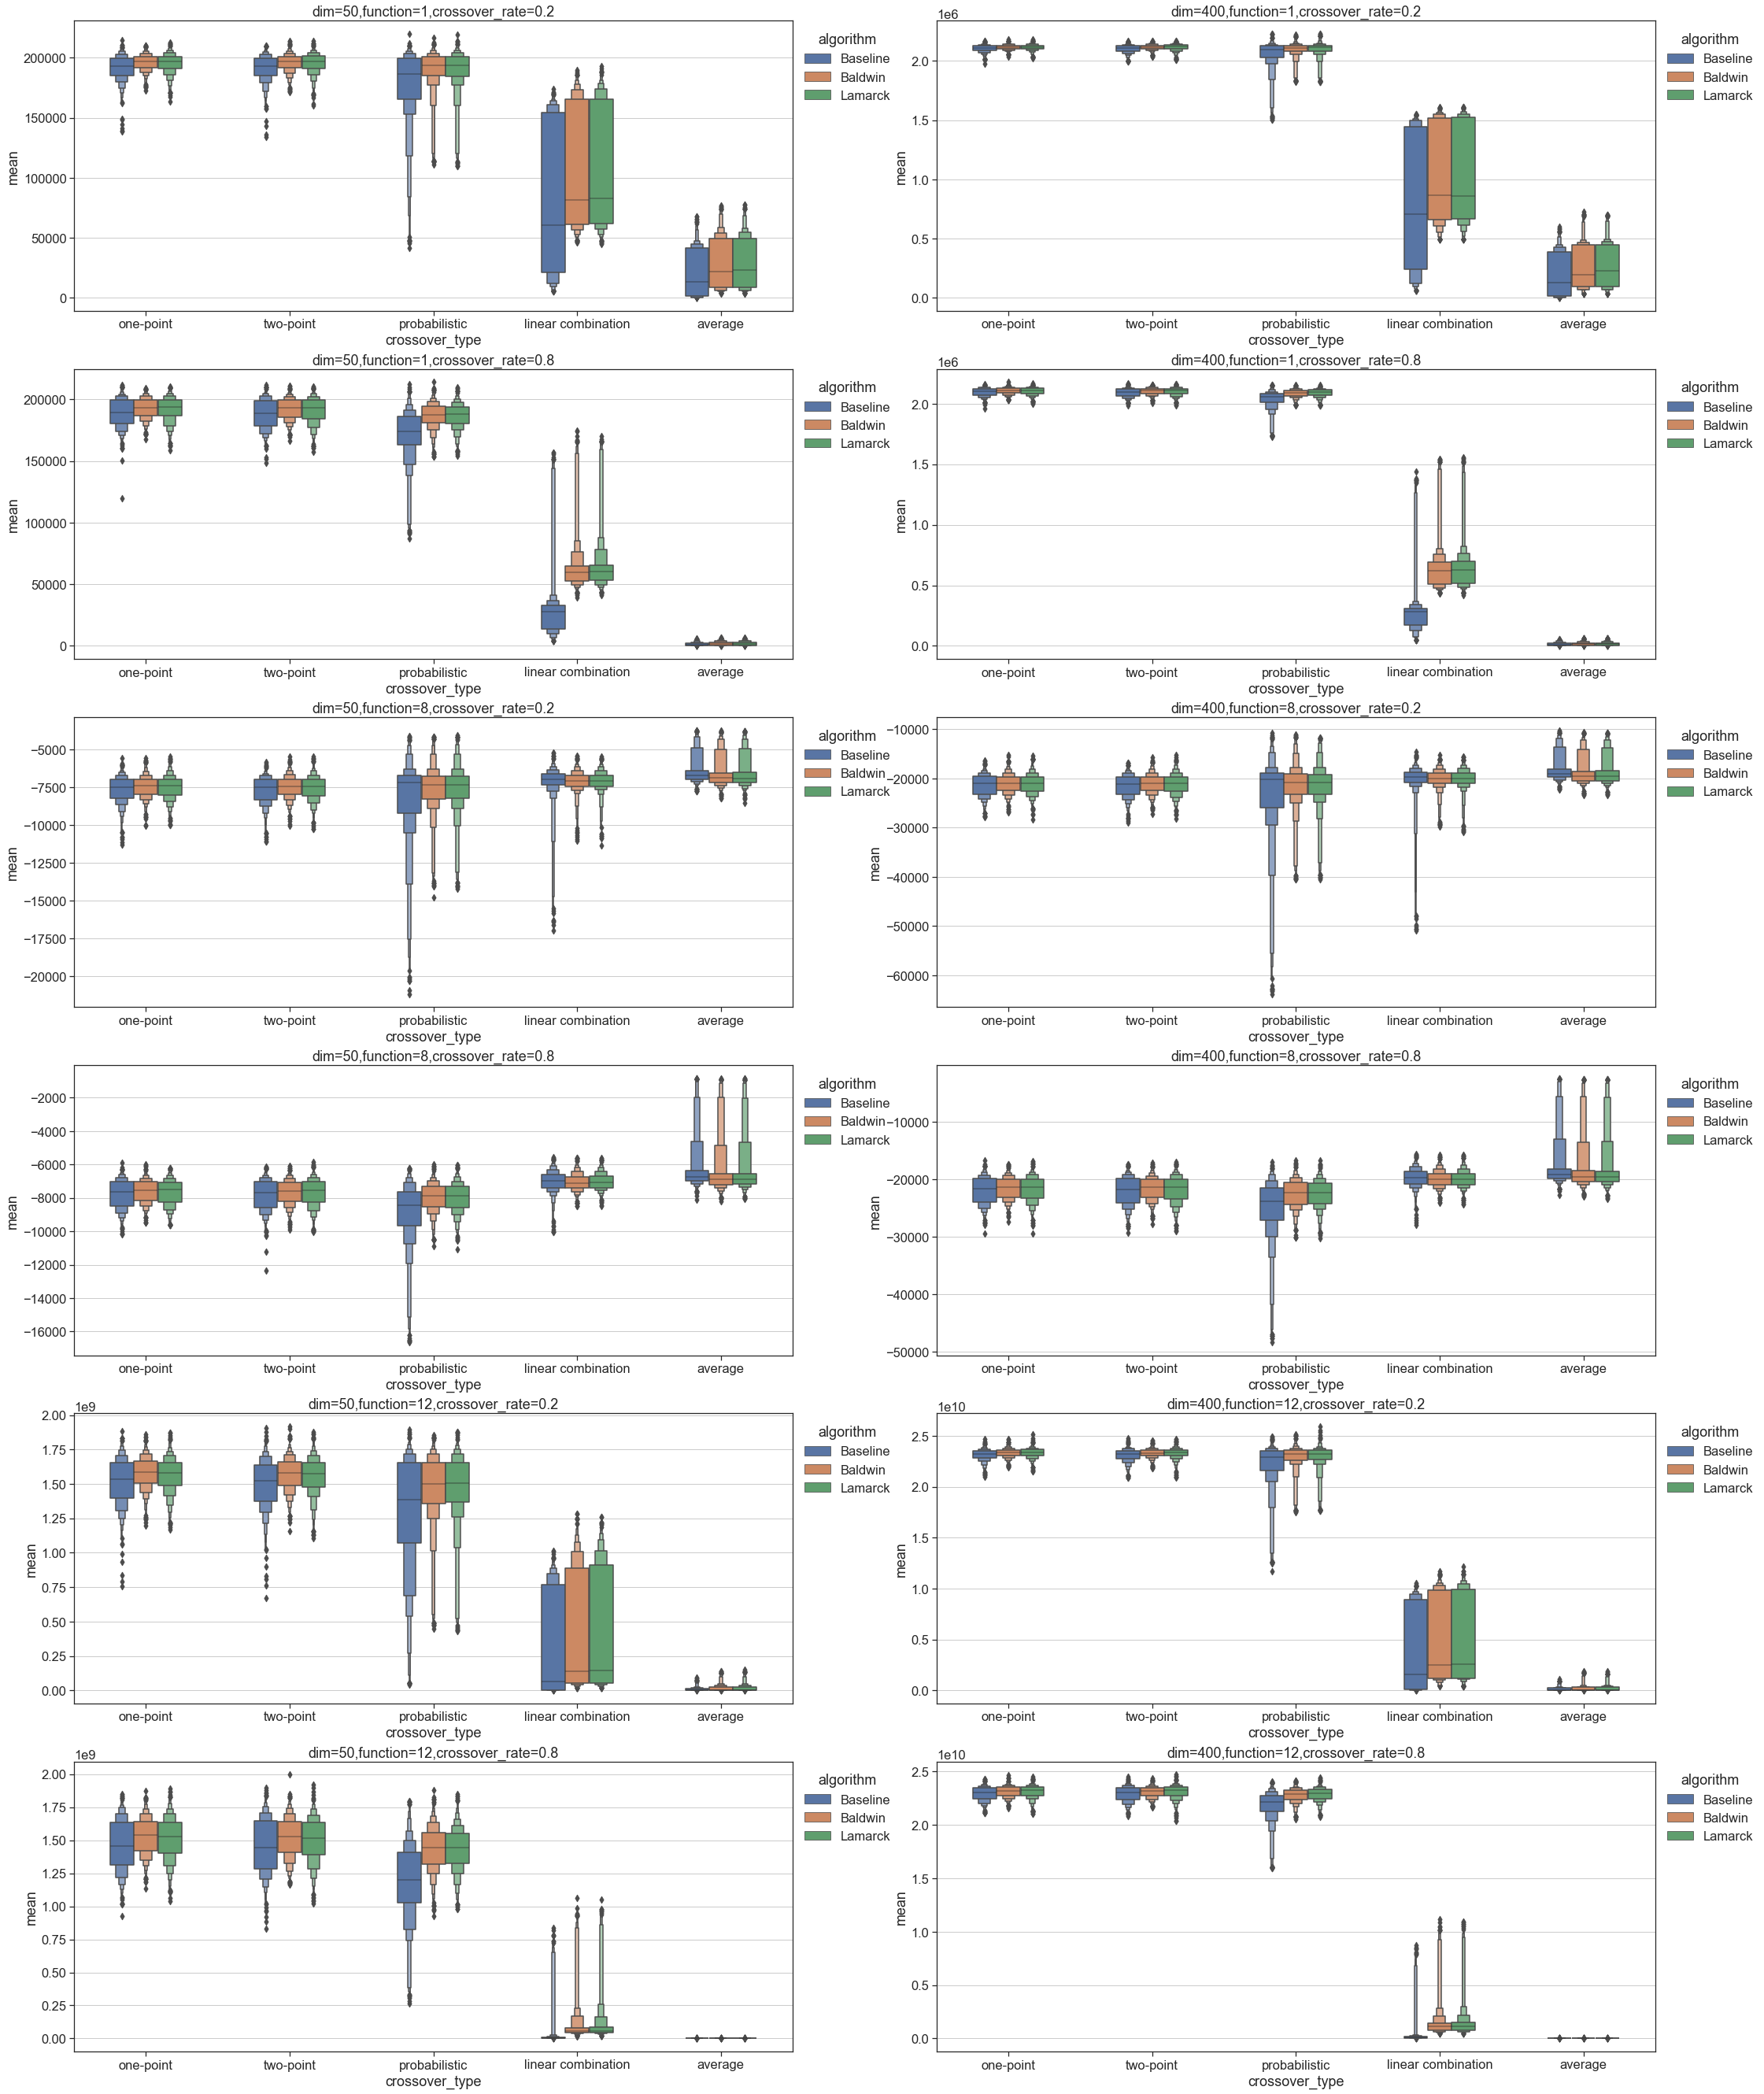

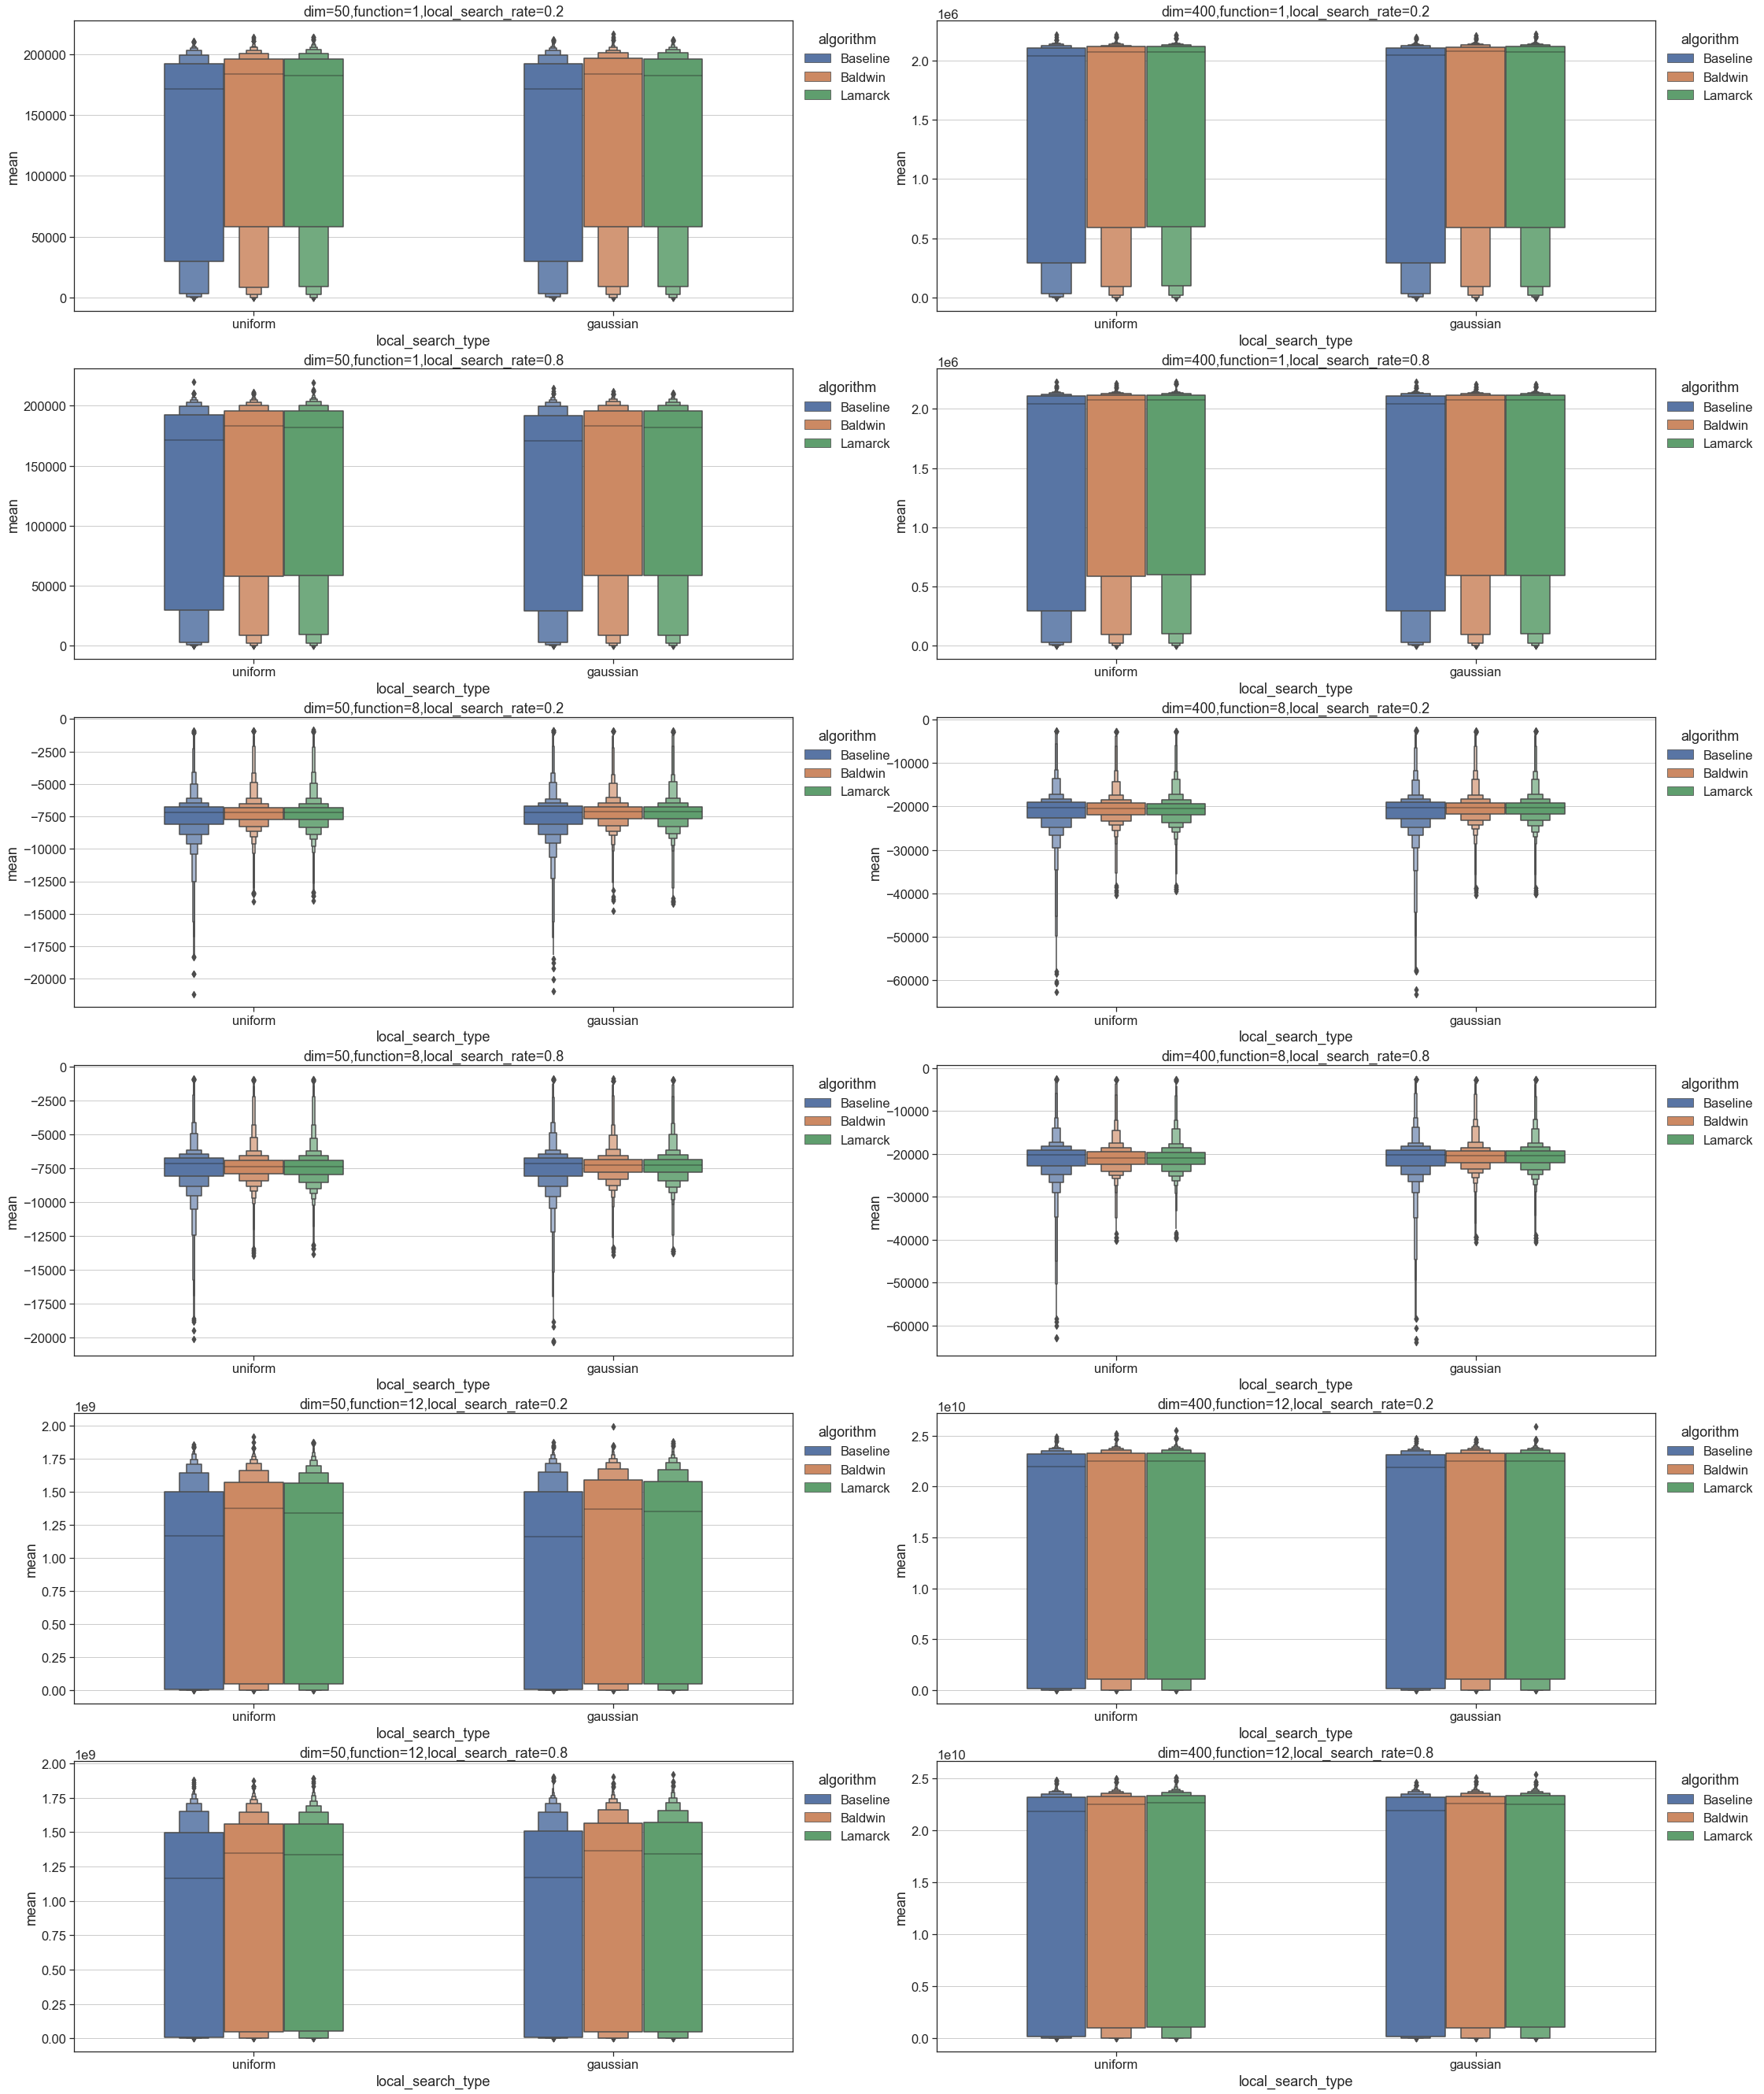

In [334]:
 def show_graph(dataframe,xp):
    rate = xp[0]
    tp = xp[1]
    sns.set_theme(style="whitegrid",font_scale=1.5)
    sns.set_style("ticks",{'axes.grid' : True})
    dist_cols = 2
    dist_rows = 10
    plt.figure(figsize=(18 * dist_cols, 8 * dist_rows))
    i = 1
    for func in function_list:
        for w in [0.2,0.8]:
            for dim in dimensions_list:
                data = dataframe[dataframe["fitness_function"] == func]
                data = data[data["dimensions"] == dim]
                data = data[data[rate] == w]
                plt.subplot(dist_rows, dist_cols, i)
                ax = sns.boxenplot(data=data, y="mean",x=tp,hue="algorithm",hue_order=["Baseline","Baldwin","Lamarck"],width=0.5)
                sns.move_legend(ax, "upper left", bbox_to_anchor=(1,1),frameon=False)
                plt.title(f"dim={dim},function={func},{rate}={w}")
                i = i + 1
    plt.savefig(f"{tp}combine.png", dpi=400,bbox_inches='tight')
    plt.show()
xp_list=[['mutation_rate','mutation_type'], ['crossover_rate', 'crossover_type'], ['local_search_rate', 'local_search_type']]
for i in xp_list:
    show_graph(dataframe=df,xp=i)

In [335]:
gg = df["gg"].unique().tolist()
print(colorama.Fore.BLUE+f"{len(gg)} gg in total")

5 gg in total


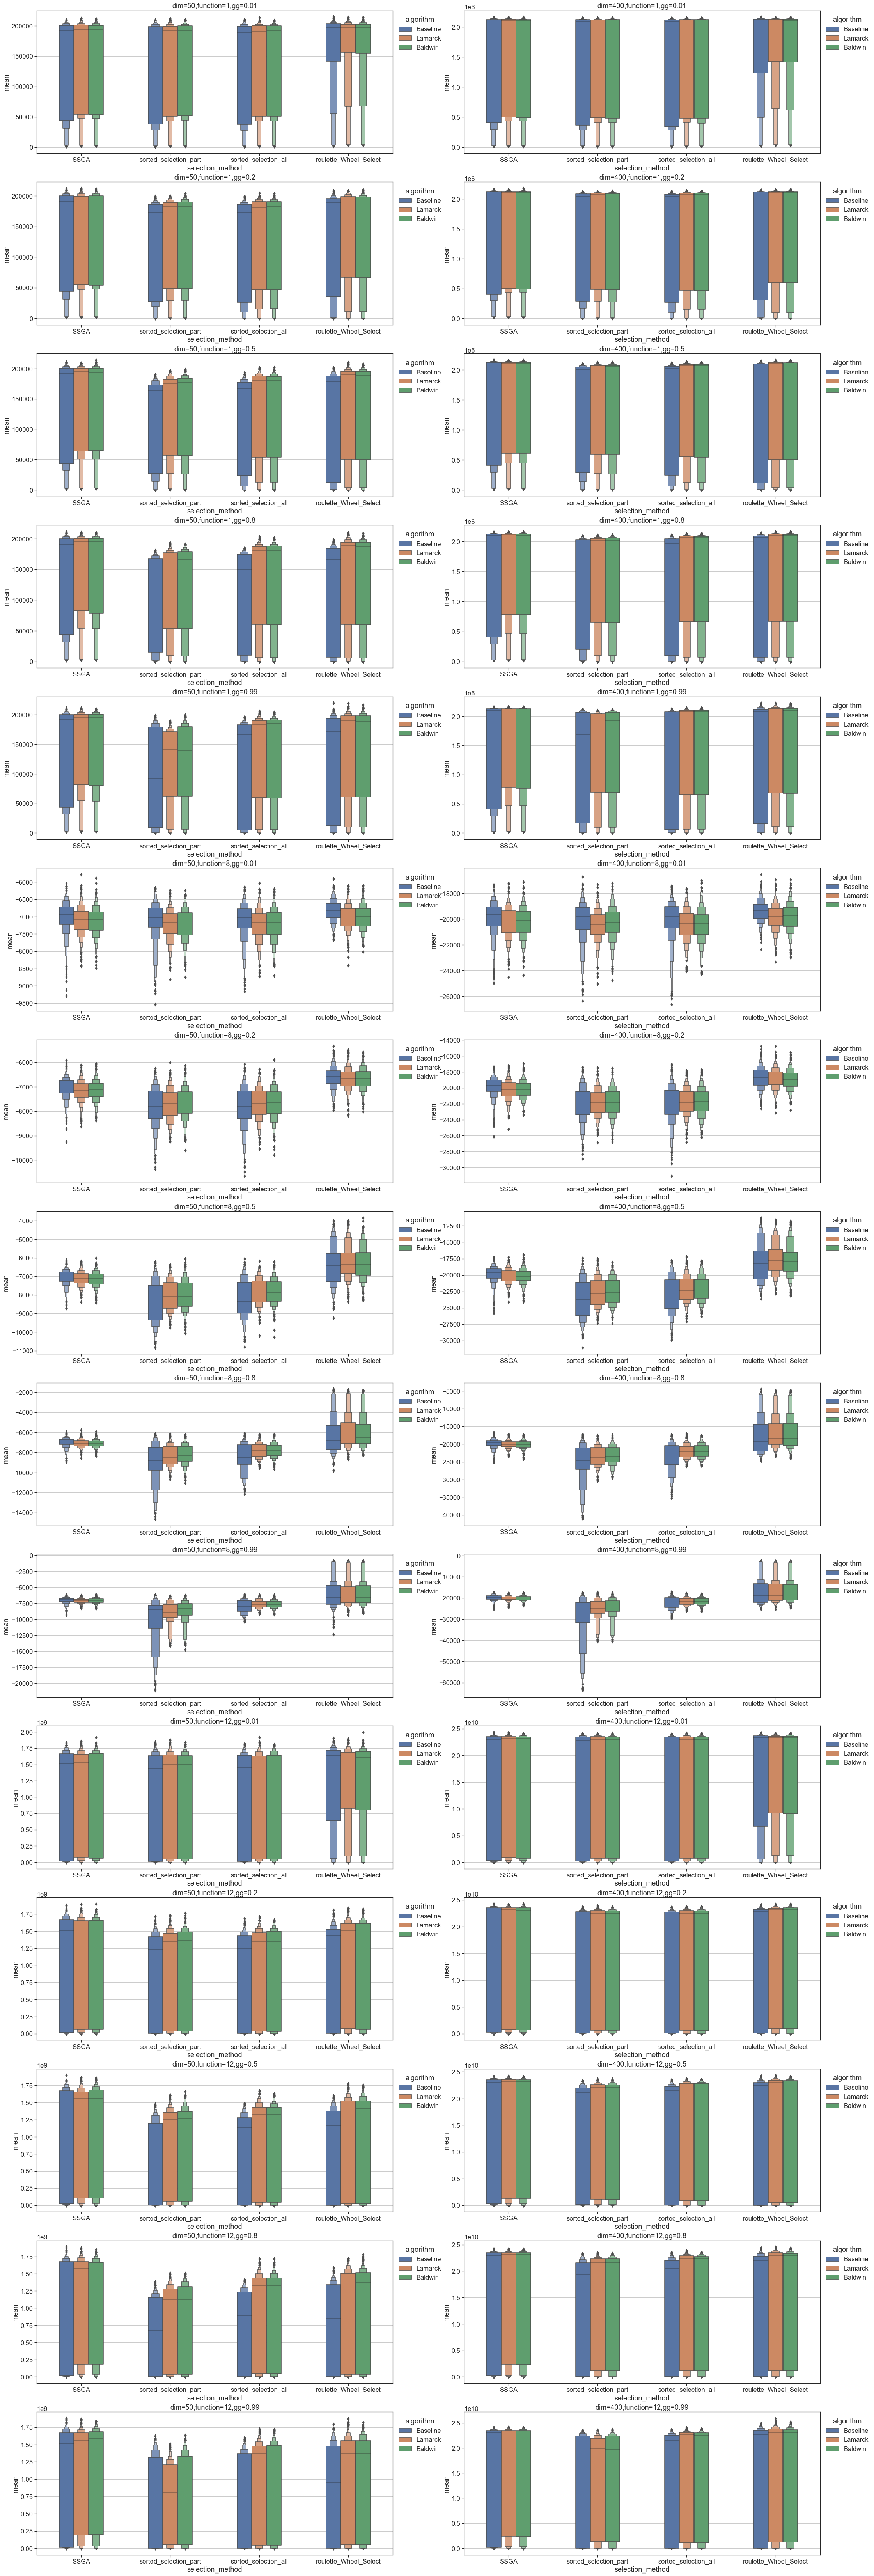

In [336]:
 def show_graph(dataframe,xp):
    rate = xp[0]
    tp = xp[1]
    sns.set_theme(style="whitegrid",font_scale=1.5)
    sns.set_style("ticks",{'axes.grid' : True})
    dist_cols = 2
    dist_rows = 15
    plt.figure(figsize=(18 * dist_cols, 8 * dist_rows))
    i = 1
    for func in function_list:
        for w in gg:
            for dim in dimensions_list:
                data = dataframe[dataframe["fitness_function"] == func]
                data = data[data["dimensions"] == dim]
                data = data[data[rate] == w]
                plt.subplot(dist_rows, dist_cols, i)
                ax = sns.boxenplot(data=data, y="mean",x=tp,hue="algorithm",width=0.5)
                sns.move_legend(ax, "upper left", bbox_to_anchor=(1,1),frameon=False)
                plt.title(f"dim={dim},function={func},{rate}={w}")
                i = i + 1
    plt.savefig(f"{tp}combine.png", dpi=400,bbox_inches='tight')
    plt.show()
xp_list=[["gg",'selection_method']]
for i in xp_list:
    show_graph(dataframe=df,xp=i)

In [337]:
df_list=[]
for func in function_list:
    temp = df[df["fitness_function"] == func]
    temp = temp.reset_index(drop=True)
    df_list.append(temp)

sorted_list=[]
for i in df_list:
    print(i.shape)
    i = i.sort_values(by=['mean'],ascending=True)
    i["Rank"] = [i for i in range(1,57601)]
    i = i.sort_index(ascending=True)
    sorted_list.append(i)
    print(i.head(5))

(57600, 30)
   num_generations  mutation_rate  num_individuals  crossover_rate  \
0             2000            0.2              200             0.2   
1             2000            0.2              200             0.2   
2             2000            0.2              200             0.2   
3             2000            0.2              200             0.2   
4             2000            0.2              200             0.2   

  mutation_type crossover_type  local_search_rate local_search_type  \
0       uniform      one-point                0.2           uniform   
1       uniform      one-point                0.2           uniform   
2       uniform      one-point                0.2           uniform   
3       uniform      one-point                0.2           uniform   
4       uniform      one-point                0.2           uniform   

   search_radius  num_evaluations  ...           Run6           Run7  \
0           0.01             2000  ...  119049.858836  116611.815008

In [338]:
result = pd.concat(sorted_list, axis=1, join='inner')
print(result.shape,result.columns.tolist())

(57600, 93) ['num_generations', 'mutation_rate', 'num_individuals', 'crossover_rate', 'mutation_type', 'crossover_type', 'local_search_rate', 'local_search_type', 'search_radius', 'num_evaluations', 'threshold', 'gg', 'dimensions', 'selection_method', 'fitness_function', 'algorithm', 'Run1', 'Run2', 'Run3', 'Run4', 'Run5', 'Run6', 'Run7', 'Run8', 'Run9', 'Run10', 'sum', 'mean', 'min', 'max', 'Rank', 'num_generations', 'mutation_rate', 'num_individuals', 'crossover_rate', 'mutation_type', 'crossover_type', 'local_search_rate', 'local_search_type', 'search_radius', 'num_evaluations', 'threshold', 'gg', 'dimensions', 'selection_method', 'fitness_function', 'algorithm', 'Run1', 'Run2', 'Run3', 'Run4', 'Run5', 'Run6', 'Run7', 'Run8', 'Run9', 'Run10', 'sum', 'mean', 'min', 'max', 'Rank', 'num_generations', 'mutation_rate', 'num_individuals', 'crossover_rate', 'mutation_type', 'crossover_type', 'local_search_rate', 'local_search_type', 'search_radius', 'num_evaluations', 'threshold', 'gg', 'd

In [339]:
pmdf=result.filter(like="Rank")
pmdf.columns=["Rank1","Rank2","Rank3"]
pmdf["sum"]=pmdf.sum(axis=1)

/var/folders/vb/bhfltf7s0n5dmrcb5r9s80mw0000gn/T/ipykernel_69239/474957995.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pmdf["sum"]=pmdf.sum(axis=1)


In [340]:
print(pmdf)

       Rank1  Rank2  Rank3     sum
0      29621  50137  33521  113279
1      31882  52629  32245  116756
2      27420  53830  30700  111950
3      32878  40283  33861  107022
4      29934  46068  34387  110389
...      ...    ...    ...     ...
57595   5016  13580   2861   21457
57596   5321  17052   2993   25366
57597   5292  57207   3079   65578
57598   4620  57134   2819   64573
57599   5327  57062   3065   65454

[57600 rows x 4 columns]


In [341]:
pmdf = pmdf.sort_values(by=['sum'],ascending=True)
print(pmdf)

       Rank1  Rank2  Rank3     sum
18807    812   6259   1020    8091
23393    747   6902   1067    8716
47872   1475   6945    806    9226
23732   2379   5816   1923   10118
23154    298   8772   1051   10121
...      ...    ...    ...     ...
2039   57579  28532  57574  143685
36359  57509  28618  57575  143702
36119  57444  28728  57552  143724
40679  57564  28682  57488  143734
12118  57599  28615  57547  143761

[57600 rows x 4 columns]


In [342]:
pmtotal = pm[pm["fitness_function"] == 1]
pmtotal=pmtotal.reset_index(drop=True)
pmtotal=pmtotal.drop(columns=["fitness_function"])
print(pmtotal.shape)
print(pmtotal)

(57600, 15)
       num_generations  mutation_rate  num_individuals  crossover_rate  \
0                 2000            0.2              200             0.2   
1                 2000            0.2              200             0.2   
2                 2000            0.2              200             0.2   
3                 2000            0.2              200             0.2   
4                 2000            0.2              200             0.2   
...                ...            ...              ...             ...   
57595             2000            0.8              200             0.8   
57596             2000            0.8              200             0.8   
57597             2000            0.8              200             0.8   
57598             2000            0.8              200             0.8   
57599             2000            0.8              200             0.8   

         mutation_type crossover_type  local_search_rate local_search_type  \
0              unifor

In [343]:
pmlist = pmdf.index.tolist()[:65]
print(pmlist)
last= pmtotal.iloc[pmlist]
print(last)
last = last[last["algorithm"] =="Baseline"]
print(last)
last.to_csv("./best_20_baseline.csv",header=True)

[18807, 23393, 47872, 23732, 23154, 56968, 52431, 23276, 56971, 28628, 47852, 56946, 28431, 23562, 23156, 18355, 23707, 52363, 23924, 23680, 18571, 23683, 19073, 28433, 57207, 28171, 47368, 47347, 18956, 18284, 52169, 19196, 19051, 23728, 18932, 57187, 23609, 23271, 57231, 23204, 47131, 47393, 28124, 47583, 23753, 52647, 23106, 23756, 52192, 18331, 23994, 51907, 8994, 51930, 8991, 19071, 9354, 52796, 23251, 18928, 19192, 52119, 18929, 23632, 56994]
       num_generations  mutation_rate  num_individuals  crossover_rate  \
18807             2000            0.2              200             0.8   
23393             2000            0.2              200             0.8   
47872             2000            0.8              200             0.8   
23732             2000            0.2              200             0.8   
23154             2000            0.2              200             0.8   
...                ...            ...              ...             ...   
19192             2000       